# Name: Parth Pokar
# Student ID: 43949999
EOSC 556B - Assignment 2


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
np.randomseed = 42

# Q1.
a) Create kernel function
Create a function that generates the kernel functions g(x) given scalar values
for j, p, q and a vector of locations x. Define a mesh with 100 cells with the domain
0 ≤ x ≤ 1. Describe the roles of p, q and j in the nature of the kernel function (plots
will be helpful)

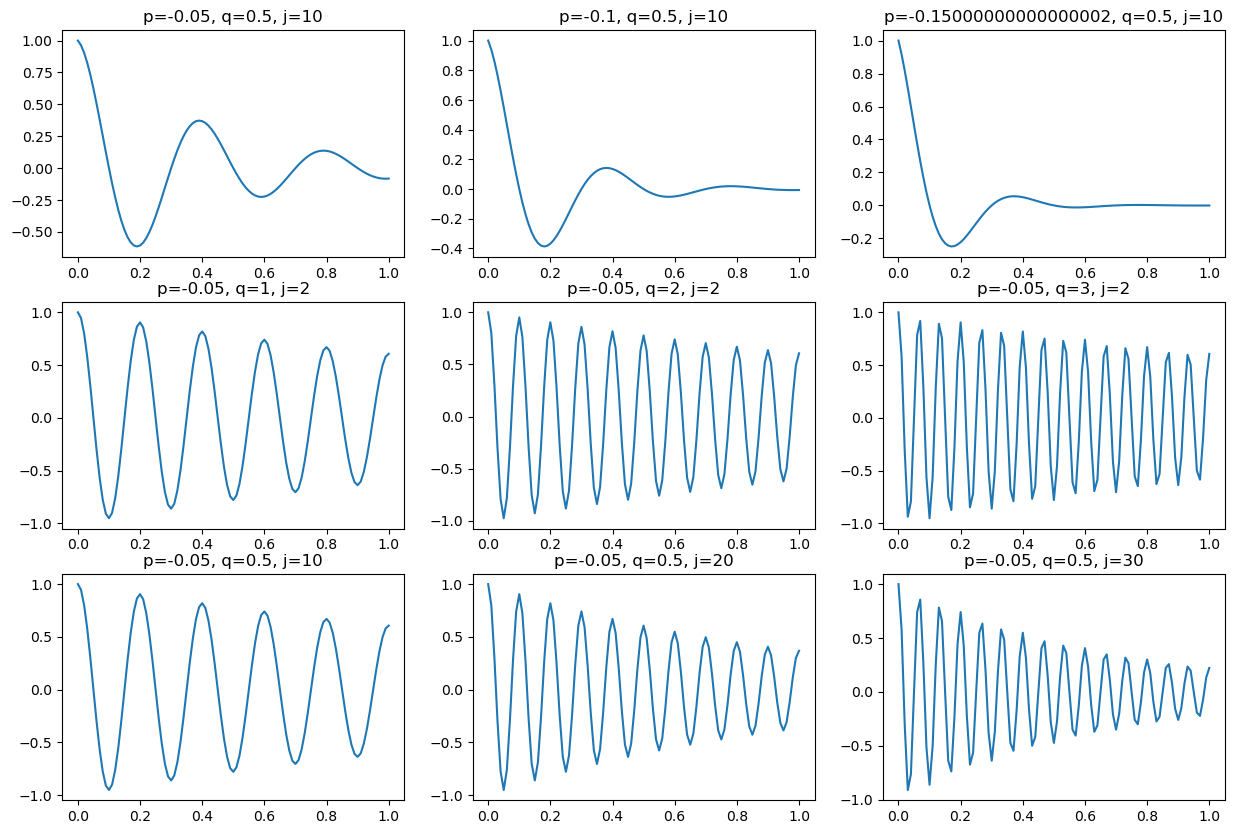

In [12]:
def kernel_function(x, j, p, q):
    return (
            np.exp(j * p * x)
            * np.cos(2 * np.pi * j * q * x)
    )

n_cells = 100
x_nodes = np.linspace(0, 1, n_cells+1)

#Role of p, q and j
p = [1, 2, 3]
q = [1, 2, 3]
j = [1, 2, 3]


fig, ax = plt.subplots(3, 3, figsize=(15, 10))
#Effect of p
for i, p_ in enumerate(p):
    ax[0, i].plot(x_nodes, kernel_function(x_nodes, j=5, p=-0.5*p_, q=0.5))
    ax[0, i].set_title(f'p={-0.05*p_}, q=0.5, j=10')

#Effect of q
for i, q_ in enumerate(q):
    ax[1, i].plot(x_nodes, kernel_function(x_nodes, j=10, p=-0.05, q=0.5*q_))
    ax[1, i].set_title(f'p=-0.05, q={q_}, j=2')


#Effect of j
for i, j_ in enumerate(j):
    ax[2, i].plot(x_nodes, kernel_function(x_nodes, j=10*j_,p=-0.05, q=0.5))
    ax[2, i].set_title(f'p=-0.05, q=0.5, j={10*j_}')
plt.show()

- Parameter p controls the decay rate of the kernel function. As p increases, the decay rate of the kernel function increases.Row #1 in the plot shows the effect of p.
- Parameter q controls the periodicity/frequency of the kernel function. As q increases, the number of oscillations in the kernel function increases. Row #2 in the plot shows the effect of q.
- Parameter j is a scaling factor for both periodicity and decay rate of the kernel function. As j increases, the number of oscillations and decay rate of the kernel function both increase. Row #3 in the plot shows the effect of j.

Q1.b) Design a model that consists of a Gaussian and a boxcar and use different
parameters than we used in class (e.g. change the location of the boxcar / Gaussian, change the amplitude, make one have a negative amplitude, etc). Plot your model.

In [13]:
def get_model(
    x_centers,
    x_boxcar_min=0.65, x_boxcar_max=0.75, amplitude_boxcar=0.55,
    x0_gaussian=0.3, sigma_gaussian=0.05, amplitude_gaussian=0.5
):
    model = np.zeros_like(x_centers)

    # boxcar
    inds_boxcar = (x_centers > x_boxcar_min) & (x_centers < x_boxcar_max)
    model[inds_boxcar] = amplitude_boxcar

    # define gaussian
    def gaussian(x, x0, sigma):
        return np.exp( - (x-x0)**2 / (2 * sigma**2))

    return model + amplitude_gaussian * gaussian(x_centers, x0_gaussian, sigma_gaussian)

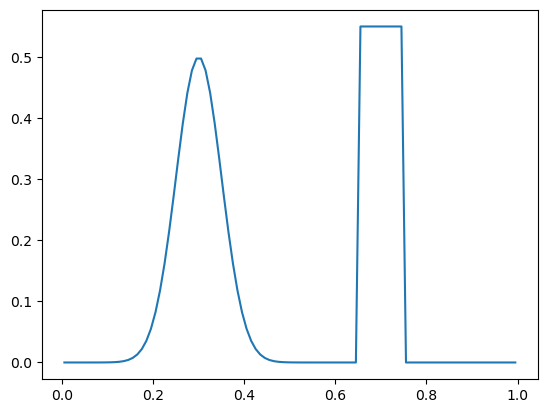

In [14]:
delta_x = np.diff(x_nodes) #x_nodes[1:] - x_nodes[:-1]
x_centers = x_nodes[:-1] + delta_x / 2
mtrue = get_model(x_centers)
plt.plot(x_centers, mtrue)

Q1.c) Next create a function that builds the forward simulation matrix G and simulate
data using 20 kernels with p = -0.05, q = 0:1, 0< j < 30, with the values for j being
evenly spaced. Create a plot with 3 subplots that show the model, kernels and data.

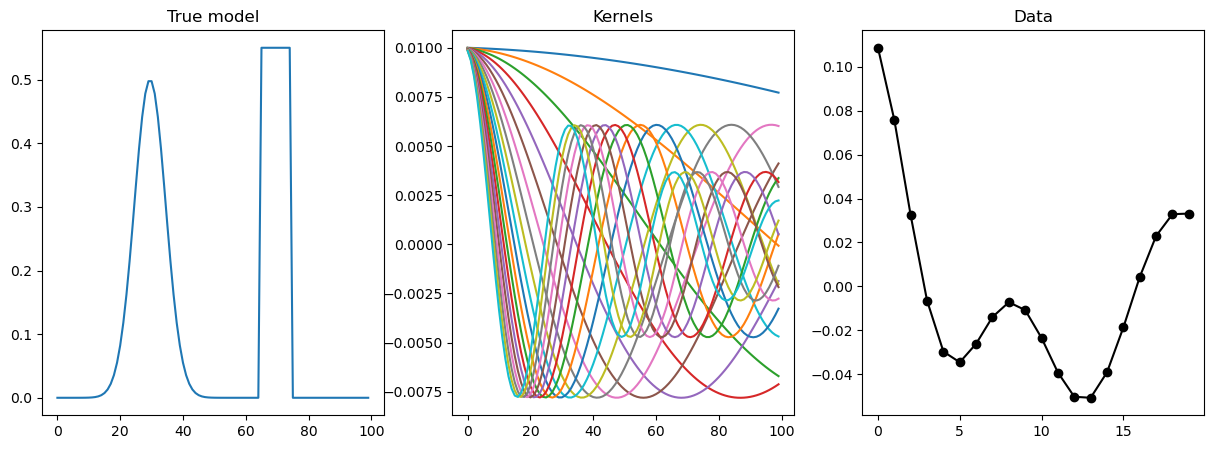

In [15]:
def build_G(x_nodes,n_kernels, j_values, p, q):
    n_nodes = len(x_nodes)
    n_centers = n_nodes - 1
    G_nodes = np.zeros((len(x_nodes), n_kernels))

    for i, j in enumerate(j_values):
        G_nodes[:, i] = kernel_function(x_nodes, j, p, q)

    #averaging matrix
    ave = sp.spdiags(0.5*np.vstack([np.ones(n_nodes), np.ones(n_nodes)]), [0, 1],m=n_centers, n=n_nodes)

    delta_x = np.diff(x_nodes)
    G = (ave @ G_nodes).T @ sp.diags(delta_x)

    return G

n_kernels = 20
j0 = 1
jN = 30

j_values = np.linspace(j0, jN, n_kernels)

G = build_G(x_nodes, n_kernels ,j_values, p=-0.05, q=0.1)
d = G @ mtrue
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(mtrue)
ax[0].set_title('True model')
ax[1].plot(G.T)
ax[1].set_title('Kernels')
ax[2].plot(d, "o-k")
ax[2].set_title('Data')
plt.show()


Q1.d) Examining concept of sensitivity. Create a function that computes the sensitivity ||d(m1) - d(m2)|| / ||delta(m)|| where m1 and m2 are two models and delta(m) is the difference between the two models.
Change the amplitude of the boxcar, compute the sensitivity using equation 4, plot the data, and comment on how a chance in the amplitude of the boxcar changes the data. Next repeat these steps changing the amplitude of the Gaussian.


Boxcar's Sensitivity : 0.06177708703510817


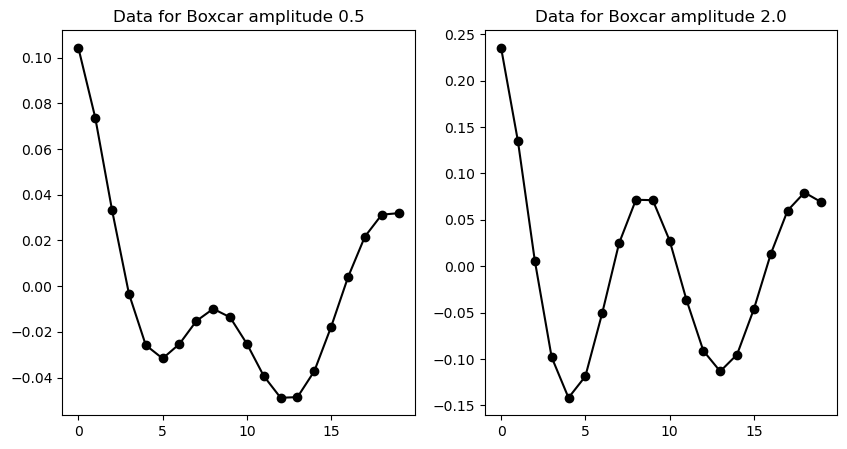

Gaussian's Sensitivity: 0.09502325109820083


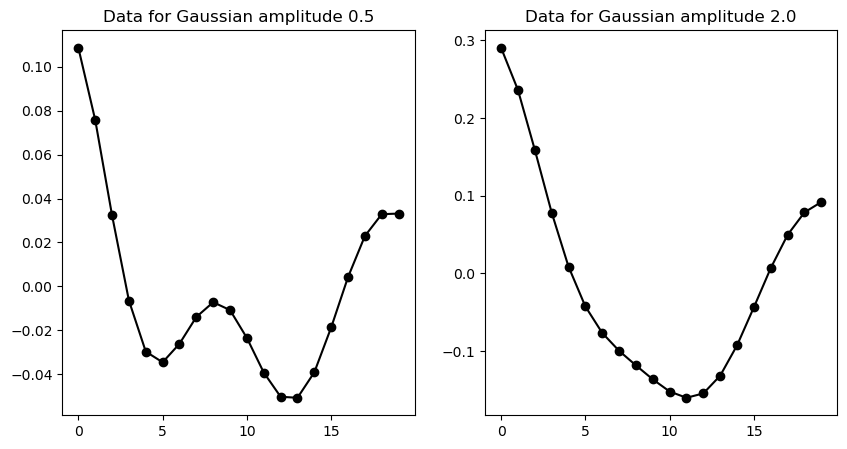

In [16]:
def sensitivity(m1, m2, d1, d2):
    delta_m = m1 - m2
    delta_d = d1 - d2
    return np.linalg.norm(delta_d) / np.linalg.norm(delta_m)

#Change the amplitude of the boxcar
model1 = get_model(x_centers, amplitude_boxcar=0.5)
model2 = get_model(x_centers, amplitude_boxcar=2.0)
d1 = G @ model1
d2 = G @ model2
sens = sensitivity(model1, model2, d1, d2)
print(f"Boxcar's Sensitivity : {sens}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(d1,"o-k")
ax[0].set_title('Data for Boxcar amplitude 0.5')
ax[1].plot(d2,"o-k")
ax[1].set_title('Data for Boxcar amplitude 2.0')
plt.show()

#Change the amplitude of the Gaussian
model1 = get_model(x_centers, amplitude_gaussian=0.5)
model2 = get_model(x_centers, amplitude_gaussian=2.0)
d1 = G @ model1
d2 = G @ model2
sens = sensitivity(model1, model2, d1, d2)
print(f"Gaussian's Sensitivity: {sens}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(d1,"o-k")
ax[0].set_title('Data for Gaussian amplitude 0.5')
ax[1].plot(d2,"o-k")
ax[1].set_title('Data for Gaussian amplitude 2.0')
plt.show()



The data is sensitive to both boxcar and Gaussian function in the model. The computed sensitivity to changing the boxcar is 0.0617 and the sensitivity to changing the Gaussian is higher at 0.095.  Increasing the amplitude of the boxcar makes the boxcar style kink in the more pronounced in the data. On the other hand, increasing the amplitude of the Gaussian has the effect of smoothing out the data and the kink in the data is not present. That the kink in the data completely disappears on increasing the amplitude of the Gaussian reflects the higher sensitivity of the Gaussian feature in the model.

# Q1.e)
Now, we will look at how the kernels impact the sensitivity to features in the model. Make the kernel functions less oscillatory by decreasing q; use q = 0.05. Now change the amplitude of the boxcar and Gaussian independently. Describe how this impacts the data and quantify the sensitivity using equation 4. What happens if the kernels are more oscillatory (q = 0.2)?

Boxcar's Sensitivity : 0.06397799667879851
Gaussian's Sensitivity: 0.10251090984854128


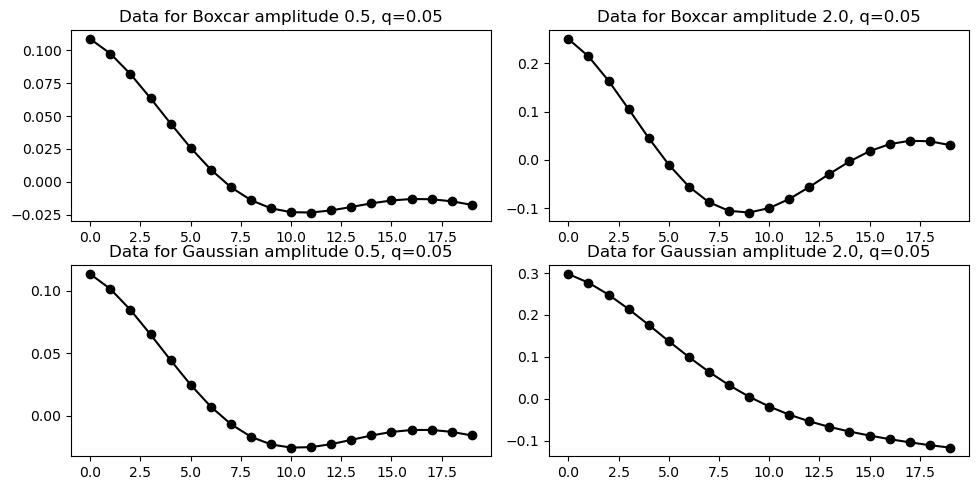

More oscillatory kernels with q=0.2
Boxcar's Sensitivity : 0.05669663508730335
Gaussian's Sensitivity: 0.07798808230250812


<Figure size 640x480 with 0 Axes>

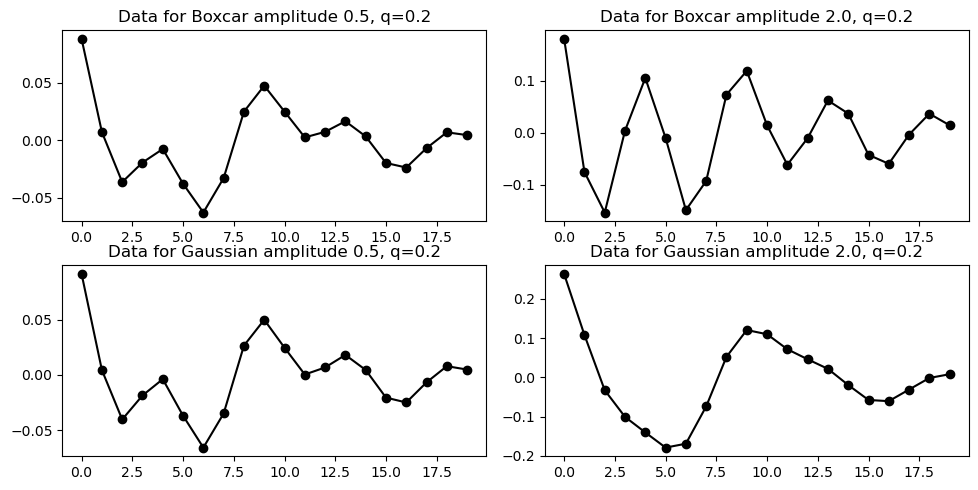

<Figure size 640x480 with 0 Axes>

In [17]:
G = build_G(x_nodes, n_kernels ,j_values, p=-0.05, q=0.05)

#Change the amplitude of the boxcar
model1 = get_model(x_centers, amplitude_boxcar=0.5)
model2 = get_model(x_centers, amplitude_boxcar=2.0)
d1 = G @ model1
d2 = G @ model2
sens = sensitivity(model2, model1, d2, d1)
print(f"Boxcar's Sensitivity : {sens}")

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0,0].plot(d1,"o-k")
ax[0,0].set_title('Data for Boxcar amplitude 0.5, q=0.05')
ax[0,1].plot(d2,"o-k")
ax[0,1].set_title('Data for Boxcar amplitude 2.0, q=0.05')
plt.tight_layout()
#Change the amplitude of the Gaussian
model1 = get_model(x_centers, amplitude_gaussian=0.5)
model2 = get_model(x_centers, amplitude_gaussian=2.0)
d1 = G @ model1
d2 = G @ model2
sens = sensitivity(model2, model1, d2, d1)
print(f"Gaussian's Sensitivity: {sens}")

ax[1,0].plot(d1,"o-k")
ax[1,0].set_title('Data for Gaussian amplitude 0.5, q=0.05')
ax[1,1].plot(d2,"o-k")
ax[1,1].set_title('Data for Gaussian amplitude 2.0, q=0.05')
plt.show()
plt.tight_layout()

#More oscillatory kernels
print(f"More oscillatory kernels with q=0.2")
G = build_G(x_nodes, n_kernels ,j_values, p=-0.05, q=0.2)

#Change the amplitude of the boxcar
model1 = get_model(x_centers, amplitude_boxcar=0.5)
model2 = get_model(x_centers, amplitude_boxcar=2.0)
d1 = G @ model1
d2 = G @ model2
sens = sensitivity(model1, model2, d1, d2)
print(f"Boxcar's Sensitivity : {sens}")

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0,0].plot(d1,"o-k")
ax[0,0].set_title('Data for Boxcar amplitude 0.5, q=0.2')
ax[0,1].plot(d2,"o-k")
ax[0,1].set_title('Data for Boxcar amplitude 2.0, q=0.2')
plt.tight_layout()

#Change the amplitude of the Gaussian
model1 = get_model(x_centers, amplitude_gaussian=0.5)
model2 = get_model(x_centers, amplitude_gaussian=2.0)
d1 = G @ model1
d2 = G @ model2
sens = sensitivity(model2, model1, d2, d1)
print(f"Gaussian's Sensitivity: {sens}")
ax[1,0].plot(d1,"o-k")
ax[1,0].set_title('Data for Gaussian amplitude 0.5, q=0.2')
ax[1,1].plot(d2,"o-k")
ax[1,1].set_title('Data for Gaussian amplitude 2.0, q=0.2')

plt.show()
plt.tight_layout()

With lower oscillatory kernels, the boxcar has lower sensitivity. So when the amplitude of boxcar is increased, the data is slightly flatter but mostly unchanged. However, when the amplitude of the Gaussian is increared the data changes and is lot flatter reflecting the greater sensitvity of the low osciallation kernels to the Gaussian.

With higher oscillatory kernels, the sensitivity of boxcar is greater and the data have more structure when boxcar has greater amplitude.

In general, the data is more osciallatory when the kernels are more osciallatory, in particular when the amplitude of the boxcar is increased. The data is flatter when the amplitude of the Gaussian is increased.

# Q1.f)
Set q = 0.1 again. Finally, create some examples that show how p impacts sensitivity. Change p to make the kernels decay more rapidly, and then less rapidly and describe how the data changes with changes in the model parameters in each scenario.

Boxcar's Sensitivity p=-0.05: 0.03193224166673052
Gaussian's Sensitivity p=-0.05: 0.09502325109820083


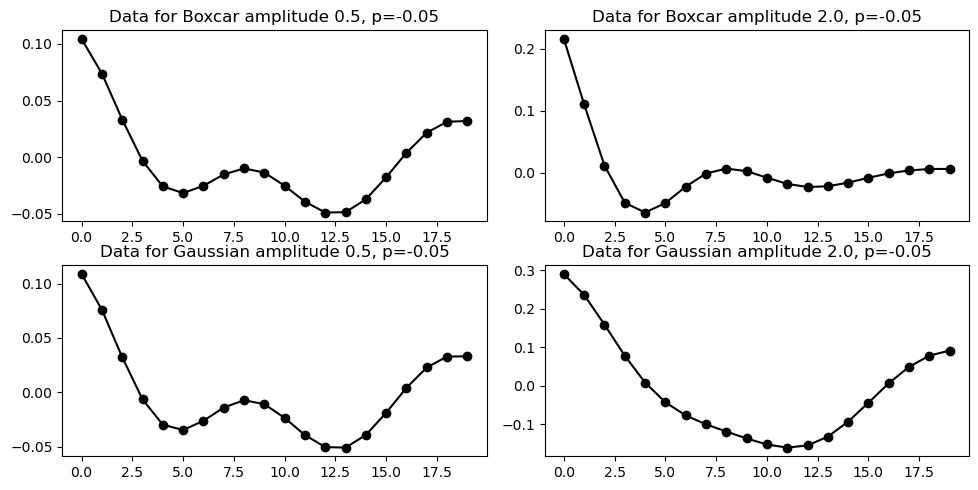

Boxcar's Sensitivity with p=-0.2: 0.03193224166673052
Gaussian's Sensitivity p=-0.2: 0.0638003602073208


<Figure size 640x480 with 0 Axes>

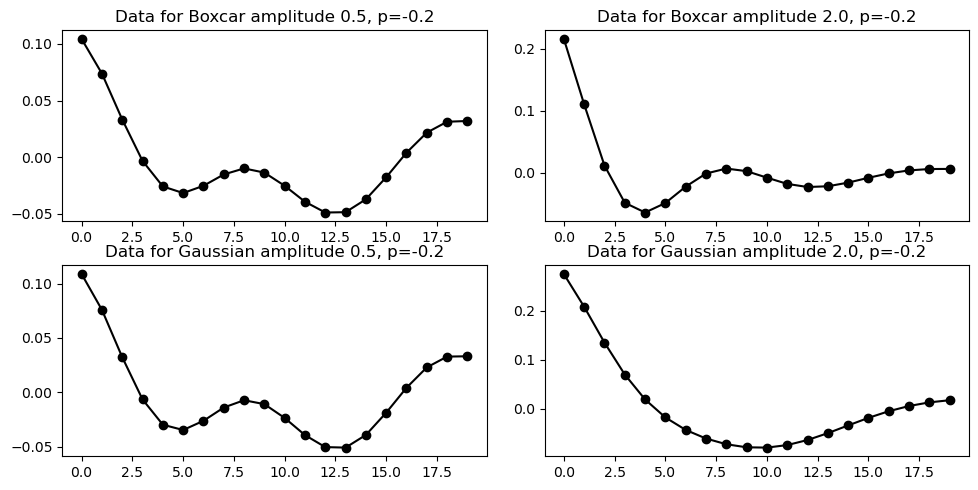

<Figure size 640x480 with 0 Axes>

In [18]:
G_p1 = build_G(x_nodes, n_kernels ,j_values, p=-0.05, q=0.1)
G_p2 = build_G(x_nodes, n_kernels ,j_values, p=-0.2, q=0.1)
#Change the amplitude of the boxcar
model1 = get_model(x_centers, amplitude_boxcar=0.5)
model2 = get_model(x_centers, amplitude_boxcar=2.0)
d1 = G_p1 @ model1
d2 = G_p2 @ model2
sens = sensitivity(model1, model2, d1, d2)
print(f"Boxcar's Sensitivity p=-0.05: {sens}")

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0,0].plot(d1,"o-k")
ax[0,0].set_title('Data for Boxcar amplitude 0.5, p=-0.05')
ax[0,1].plot(d2,"o-k")
ax[0,1].set_title('Data for Boxcar amplitude 2.0, p=-0.05')
plt.tight_layout()

#Change the amplitude of the Gaussian
model1 = get_model(x_centers, amplitude_gaussian=0.5)
model2 = get_model(x_centers, amplitude_gaussian=2.0)
d1 = G_p1 @ model1
d2 = G_p1 @ model2
sens = sensitivity(model1, model2, d1, d2)
print(f"Gaussian's Sensitivity p=-0.05: {sens}")
ax[1,0].plot(d1,"o-k")
ax[1,0].set_title('Data for Gaussian amplitude 0.5, p=-0.05')
ax[1,1].plot(d2,"o-k")
ax[1,1].set_title('Data for Gaussian amplitude 2.0, p=-0.05')

plt.show()
plt.tight_layout()
## Change p to make the kernels decay more rapidly
#Change the amplitude of the boxcar
model1 = get_model(x_centers, amplitude_boxcar=0.5)
model2 = get_model(x_centers, amplitude_boxcar=2.0)
d1 = G_p1 @ model1
d2 = G_p2 @ model2
sens = sensitivity(model1, model2, d1, d2)
print(f"Boxcar's Sensitivity with p=-0.2: {sens}")

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0,0].plot(d1,"o-k")
ax[0,0].set_title('Data for Boxcar amplitude 0.5, p=-0.2')
ax[0,1].plot(d2,"o-k")
ax[0,1].set_title('Data for Boxcar amplitude 2.0, p=-0.2')
plt.tight_layout()

#Change the amplitude of the Gaussian
model1 = get_model(x_centers, amplitude_gaussian=0.5)
model2 = get_model(x_centers, amplitude_gaussian=2.0)
d1 = G_p1 @ model1
d2 = G_p2 @ model2
sens = sensitivity(model1, model2, d1, d2)
print(f"Gaussian's Sensitivity p=-0.2: {sens}")
ax[1,0].plot(d1,"o-k")
ax[1,0].set_title('Data for Gaussian amplitude 0.5, p=-0.2')
ax[1,1].plot(d2,"o-k")
ax[1,1].set_title('Data for Gaussian amplitude 2.0, p=-0.2')

plt.show()
plt.tight_layout()

Parameter $p$ controls the decay rate of the kernels, so when p is increased the kernels decay more rapidly. In this case, increasing the amplitude of the boxcar or Gaussian has a lower impact on the data due to the rapid decay of the kernels. The data is flatter and less sensitive to changes in the model parameters when the kernels decay more rapidly. On the other hand, when the kernels decay less rapidly, the data is more sensitive to changes in the model parameters and the data is more osciallatory.


# Q2) Invese Problem
In this question, we will set up the inverse problem.We will start by setting up all of the pieces that we need, beginning with the Wd, Ws and Wx matrices. We programmed everything for Wd and Ws in class, and we talked about what the structure of Wx should look like. Write a small function to generate Wd given values for the standard deviations of the data. Write functions to generate Ws and Wx given the locations of the nodes of the mesh.


In [19]:
def build_weight_matrices(n_kernels, std_dev, x_nodes):

    Wd = sp.diags(1/std_dev * np.ones(n_kernels))

    delta_x = np.diff(x_nodes)
    Ws = sp.diags(np.sqrt(delta_x))

    #Wx makes the model smooth by penalizing the difference between adjacent model parameters with a first derivative matrix
    Wx = sp.diags([1, -1], [0, 1], shape=(len(x_nodes)-1, len(x_nodes)-1))


    return Wd, Ws, Wx

Q1.a) Test the creation of the matrices with a very small mesh (e.g. 4 cells) and very small number of data (e.g. 2 data points). Describe the shapes of each matrix and print the entries that they contain.

In [20]:
n_cells = 4
x_nodes = np.linspace(0, 1, n_cells+1)
n_data = 2
std_dev = 0.1

Wd, Ws, Wx = build_weight_matrices(n_data, std_dev, x_nodes)

print(f"Wd shape: {Wd.shape}")
print(f"Ws shape: {Ws.shape}")
print(f"Wx shape: {Wx.shape}")

print(f"Wd entries: \n{Wd.toarray()}")
print(f"Ws entries: \n{Ws.toarray()}")
print(f"Wx entries: \n{Wx.toarray()}")


Wd shape: (2, 2)
Ws shape: (4, 4)
Wx shape: (4, 4)
Wd entries: 
[[10.  0.]
 [ 0. 10.]]
Ws entries: 
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
Wx entries: 
[[ 1. -1.  0.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]


# Q2.b)
Next, we will derive the system of equations that need to be solved to solve the inverse problem and recover a model ( ~m). For simplicity, you can assume mref = 0 (as a bonus, keep mref in your derivation). We know that for a convex function, the minimum occurs when grad(phi) = 0. Take the derivative of the objective function in equation 6 and set that equal to 0. Derive the linear equations that need to be solved to estimate m.

The objective function is given by:
\begin{equation}
\phi = \phi_d(\mathbf{m}) + \phi_m(\mathbf{m}) = \frac{1}{2}||\mathbf{W_d}(\mathbf{Gm -d} )||^2 + \frac{1}{2}||\mathbf{W_s(m - m_{ref}})||^2 + \frac{1}{2}||\mathbf{W_x(m)}||^2
\end{equation}

Taking the derivative of the objective function with respect to m and setting it to zero, we get:
\begin{equation}
\frac{\partial \phi}{\partial \mathbf{m}} = \mathbf{G}^T\mathbf{W_d}^T\mathbf{W_d}(\mathbf{Gm - d}) + \mathbf{W_s}^T\mathbf{W_s(m - m_{ref}}) + \mathbf{W_x}^T\mathbf{W_x}m = 0
\end{equation}

Rearranging the terms, we get:
\begin{equation}
(\mathbf{G}^T\mathbf{W_d}^T\mathbf{W_d}\mathbf{G})\mathbf{m} + \beta(\mathbf{W_s}^T\mathbf{W_s} + \mathbf{W_x}^T\mathbf{W_x})\mathbf{m} = \mathbf{G}^T\mathbf{W_d}^T\mathbf{W_dd} + \beta \mathbf{W_s}^T\mathbf{W_s m_{ref}}
\end{equation}

The above equation can be written as a linear equation which is solved to estimate m. The equation is given by

\begin{equation}
\mathbf{Am = b}
\end{equation}

where $\mathbf{A} = (\mathbf{G}^T\mathbf{W_d}^T\mathbf{W_d}\mathbf{G} + \beta (\mathbf{W_s}^T\mathbf{W_s} + \mathbf{W_x}^T\mathbf{W_x}))$,
m = model parameters,
b = $(\mathbf{G}^T\mathbf{W_d}^T\mathbf{W_d d} + \beta \mathbf{W_s}^T\mathbf{W_s m_{ref}})$

# Q2.c)
We will program a function to estimate a model given a observed data, estimates of the uncertainties on those data, and the parameters $\beta$; $\alpha_s$; $\alpha_x$. It is also a good idea to have this function take the matrix $G$ so that it is easy to later play with the kernels.
Create this function.
Now we will use it to recover a model. Use the parameters for the kernels described in Q1c and add Gaussian random noise with a standard deviation of $10^{-2}$.


In [21]:
def estimate_model(G, d, n_kernels, std_dev, x_nodes, mref, beta, alpha_s, alpha_x):


    Wd, Ws, Wx = build_weight_matrices(n_kernels, std_dev, x_nodes)
    #densify weight matrices
    Wd = Wd.toarray()
    Ws = Ws.toarray()
    Wx = Wx.toarray()
    #System of equations
    A = G.T @ Wd.T @ Wd @ G + beta * (alpha_s * Ws.T @ Ws + alpha_x * Wx.T @ Wx)
    b = G.T @ Wd.T @ Wd @ d + beta * (alpha_s * Ws.T @ Ws @ mref)
    m = np.linalg.solve(A, b)
    #data misfit
    residual_data = G @ m - d
    phi_d = residual_data.T @ Wd.T @ Wd @ residual_data
    #model misfit
    residual_model = m - mref
    phi_m = residual_model.T @ (Ws+Wx).T @ (Ws+Wx) @ residual_model

    return m, phi_d, phi_m


Try two different scenarios:
1) assign the correct standard deviations to the observed data and use $\alpha_s$ = 1 and
$\alpha_x$ = 0. Choose a $\beta$-value that gives you $\phi_d ~ N$ where $N$ is the number of
data.
2) assign the correct standard deviations to the observed data and use $\beta = 10^3$,
$\alpha_s$ = 0 and $\alpha_x$ = 1. Choose a $\beta$-value that gives you $\phi_d ~ N$ where $N$ is the
number of data.

In [28]:
std_dev = 1e-2
n_cells = 100
x_nodes = np.linspace(0, 1, n_cells+1)
n_kernels = 20
j_values = np.linspace(0, 30, n_kernels)

G = build_G(x_nodes, n_kernels ,j_values=j_values, p=-0.05, q=0.1)
dclean = G @ mtrue
dobs = dclean + std_dev * np.random.randn(len(dclean))

Wd, Ws, Wx = build_weight_matrices(n_kernels, std_dev, x_nodes)

mref = np.zeros(n_cells)
def plot_results(true_model, recovered_model, G, d,beta,phi_d):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(true_model, label='True model')
    ax[0].plot(recovered_model, label='Recovered model')
    ax[0].set_title('Model with $\\beta$ = ' + str(beta))
    ax[0].legend()

    ax[1].plot(G.T)
    ax[1].set_title('Kernels')

    d_pred = G @ recovered_model
    ax[2].plot(d, "o-k", label='Observed data')
    ax[2].plot(d_pred, "o-r", label='Predicted data')
    ax[2].set_title('Data with $\\phi_d$ = ' + str(phi_d))
    ax[2].legend()

    plt.tight_layout()
    plt.show()

##Case 1:
beta11 = 10
alpha_s1 = 1
alpha_x1 = 0
m11, phi_d11, phi_m11 = estimate_model(G, dobs, n_kernels, std_dev, x_nodes, mref, beta11, alpha_s1, alpha_x1)

beta12 = 1e3
m12, phi_d12, phi_m12 = estimate_model(G, dobs, n_kernels, std_dev, x_nodes, mref, beta12, alpha_s1, alpha_x1)

##Case 2:
beta21 = 10
alpha_s2 = 0
alpha_x2 = 1
m21, phi_d21, phi_m21 = estimate_model(G, dobs, n_kernels, std_dev, x_nodes, mref, beta21, alpha_s2, alpha_x2)

beta22 = 1e3
m22, phi_d22, phi_m22 = estimate_model(G, dobs, n_kernels, std_dev, x_nodes, mref, beta22, alpha_s2, alpha_x2)

Generate a plot with three panels that shows: (a) the true and recovered models, (b) the kernels, and (c) the observed and predicted data for each of these scenarios (it will be useful if you create a function for generating these plots that takes the true and recovered models, and G matrix). Specify the choice of $\beta$ and the resultant $\phi_d$-value (here, I am only looking for something that is the right order of magnitude, e.g. try $\beta = 10^2; 10^3; 10^4$,...)

For case 1 with alpha_s = 1 and alpha_x = 0


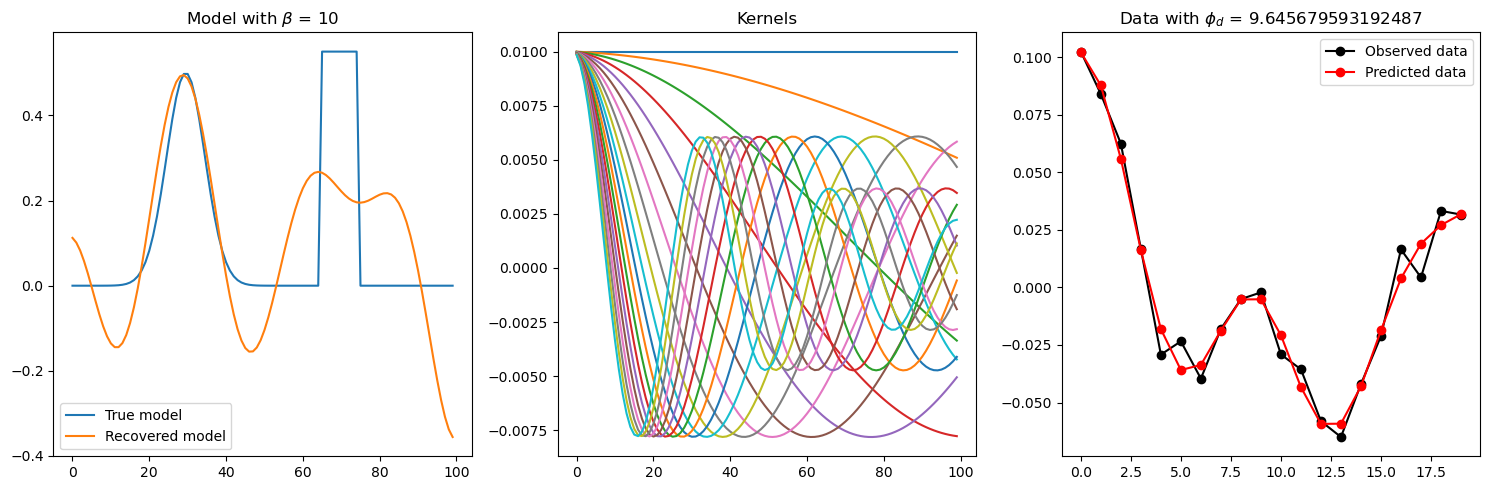

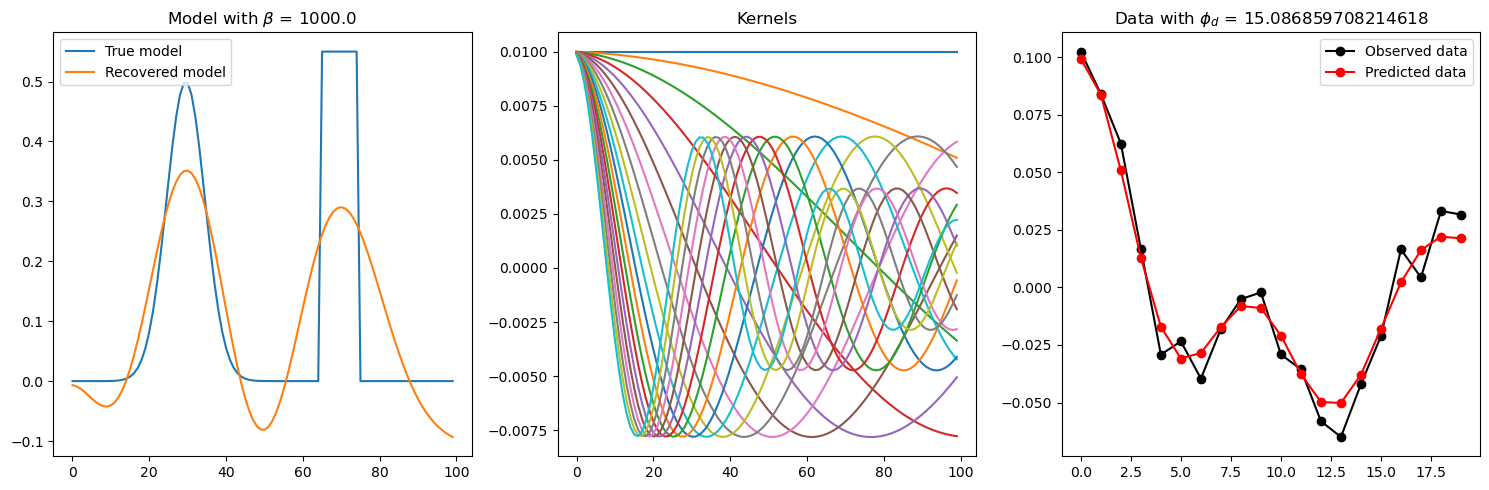

For case 2 with alpha_s = 0 and alpha_x = 1


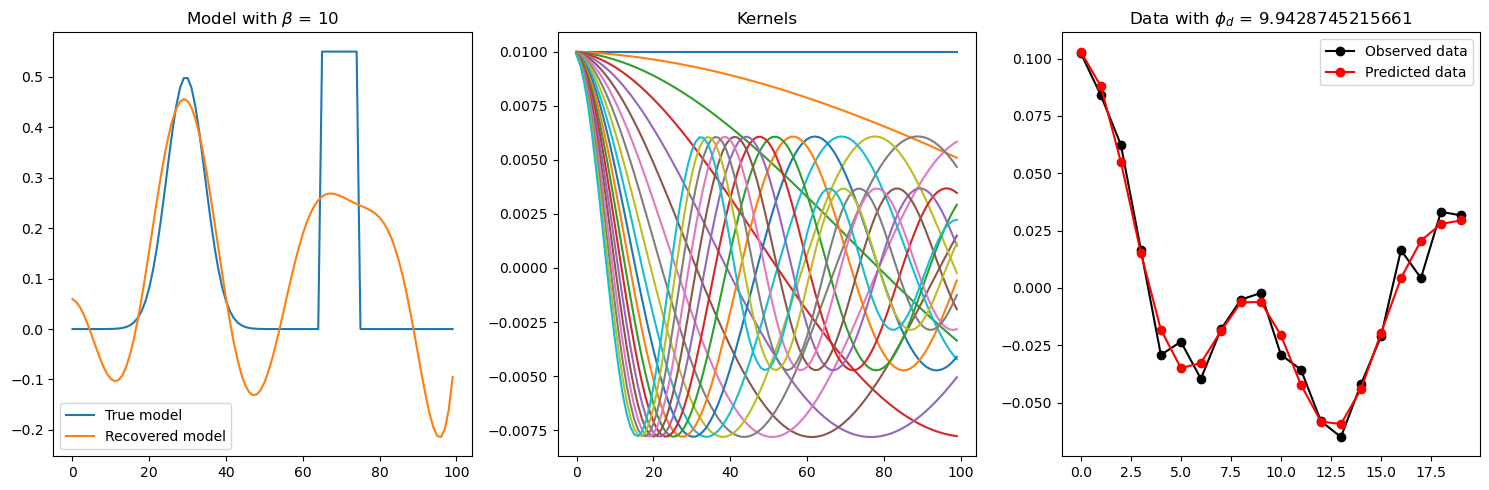

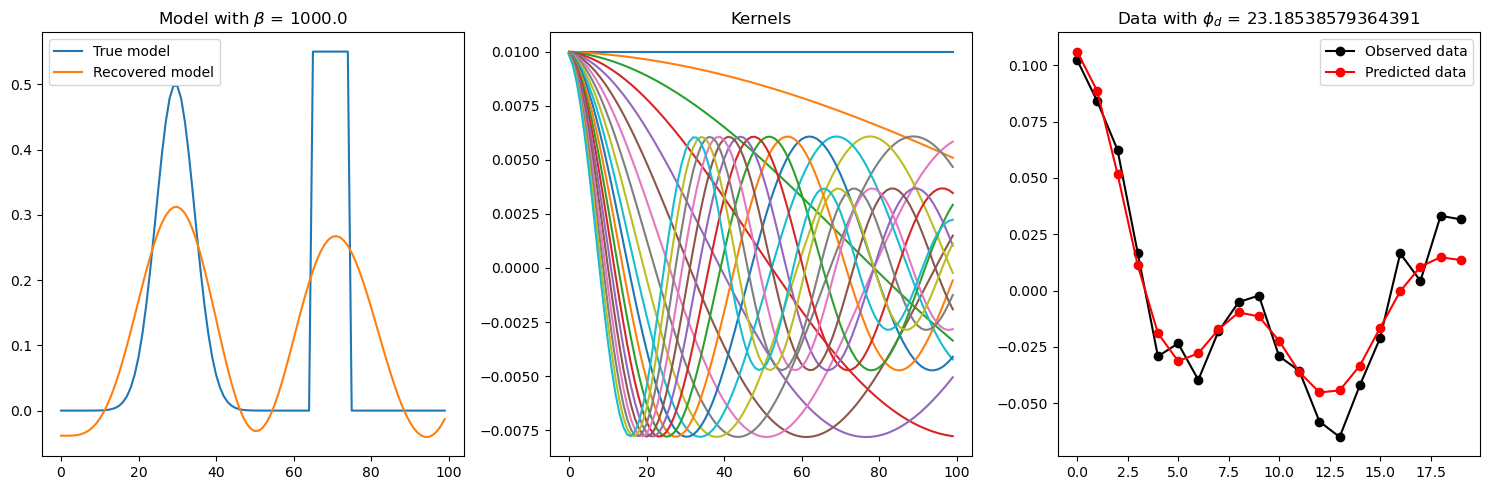

In [29]:
##Case 1
print("For case 1 with alpha_s = 1 and alpha_x = 0")
plot_results(mtrue, m11, G, dobs, beta11, phi_d11)
plot_results(mtrue, m12, G, dobs, beta12, phi_d12)

##
print("For case 2 with alpha_s = 0 and alpha_x = 1")
plot_results(mtrue, m21, G, dobs, beta21, phi_d21)
plot_results(mtrue, m22, G, dobs, beta22, phi_d22)


# Q3. Tikhonov Curves
Q3.a) Create a vector that contains 50 values of $\beta$ that are logarithmically spaced between $\beta=10^6$ and $\beta=10^{-6}$. Set $\alpha_s = 1$, $\alpha_x = 0$ and plot the Tikhonov curves. On the plots for the Tikhonov curves, plot a line where the target misfit is and use a star to indicate the $\beta$ that corresponds to the largest $\beta$ where we have reached the target misfit (e.g. the largest beta where $\phi_d \leq N$. Choose 3 locations along the curves to show: one that is underfit, one that is overfit and one that acceptably fits the data. Choose examples that aren't at the total extremes. Describe which is which.

In [32]:
n_beta = 50
beta_values = np.logspace(6,-6,n_beta)
alpha_s = 1
alpha_x = 0
target_misfit = len(dobs)

dclean = G @ mtrue
dobs_tik = dclean + std_dev * np.random.randn(len(dclean))

mrec_tik = np.zeros((len(x_centers), n_beta))  # np.nan * np.ones(shape)
phi_d_tik = np.zeros(n_beta)
phi_m_tik = np.zeros(n_beta)
target_beta = 0
target_iteration = 0

for i, beta in enumerate(beta_values):
    mrec_tik[:, i], phi_d_tik[i], phi_m_tik[i] = estimate_model(G=G,d=dobs,
                                                                n_kernels=n_kernels, std_dev=std_dev, x_nodes=x_nodes, mref=mref, beta=beta, alpha_s=alpha_s, alpha_x=alpha_x)
    if target_misfit<phi_d_tik[i]:
        target_beta = beta
        target_iteration = i


In [33]:
def plot_tikhonov(beta_values, phi_d, phi_m,iteration,ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    n_beta = len(beta_values)

    ax[0].loglog(beta_values, phi_d)
    ax[1].loglog(beta_values, phi_m)
    ax[2].loglog(phi_m, phi_d)

    ax[0].loglog(beta_values[iteration], phi_d[iteration], "*", color="C3")
    ax[1].loglog(beta_values[iteration], phi_m[iteration], "*", color="C3")
    ax[2].loglog(phi_m[iteration], phi_d[iteration], "o", color="C3")

    ax[0].loglog(beta_values, n_kernels * np.ones(n_beta), "--k")

    ax[0].set_ylabel("$\\phi_d$")
    ax[1].set_ylabel("$\\phi_m$")

    ax[2].set_ylabel("$\\phi_d$")
    ax[2].set_xlabel("$\\phi_m$")

    for a in ax[:2]:
        a.set_xlabel("$\\beta$")
        a.invert_xaxis()

    target_beta = beta_values[iteration]
    ax[0].set_title(f"Target $\\beta$ = {target_beta}")

    plt.tight_layout()

Optimal beta with alpha_s = 1 and alpha_x = 0


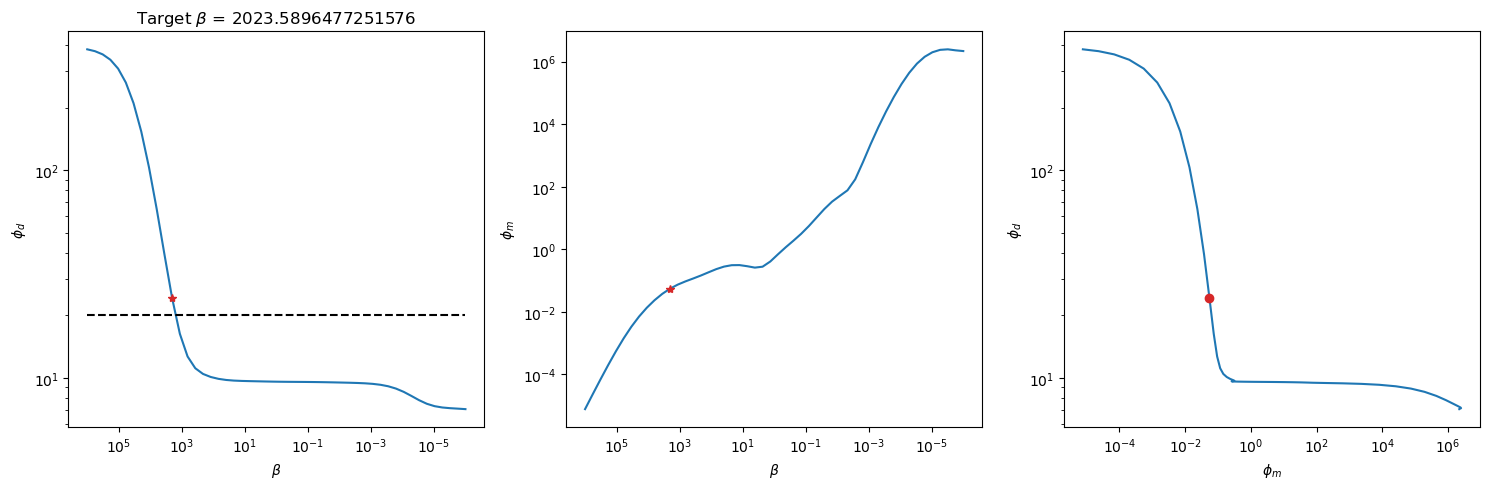

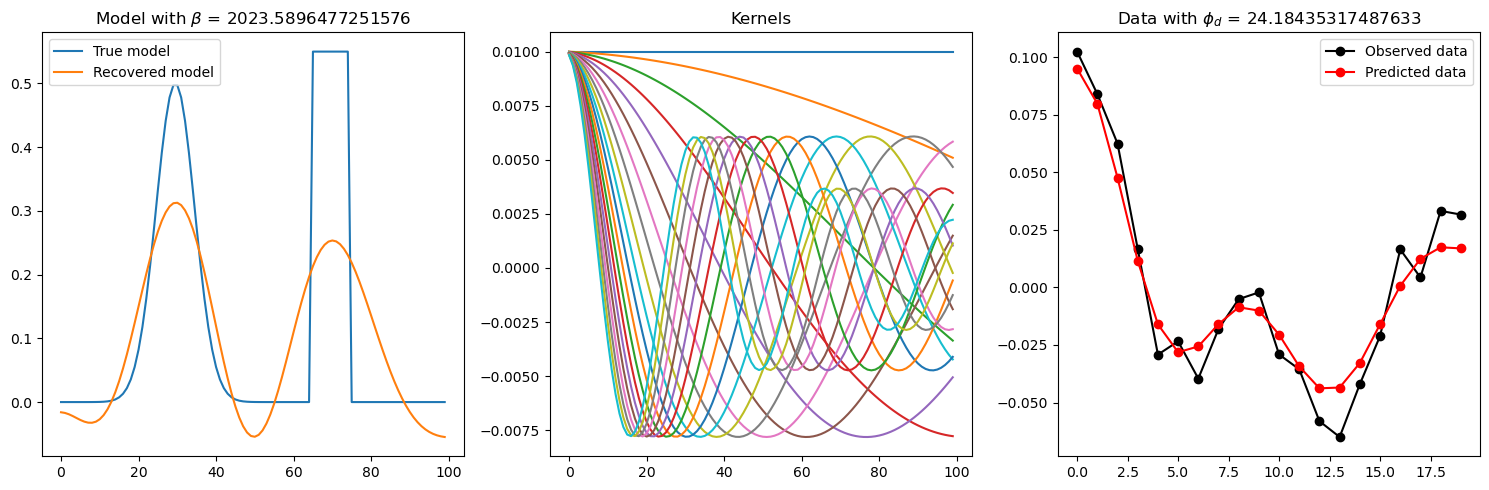

In [34]:
print("Optimal beta with alpha_s = 1 and alpha_x = 0")
plot_tikhonov(beta_values=beta_values,phi_d=phi_d_tik, phi_m=phi_m_tik, iteration=target_iteration)
plot_results(mtrue, mrec_tik[:,target_iteration],G=G,d=dobs,beta=beta_values[target_iteration], phi_d=phi_d_tik[target_iteration])

Underfitting with alpha_s = 1 and alpha_x = 0


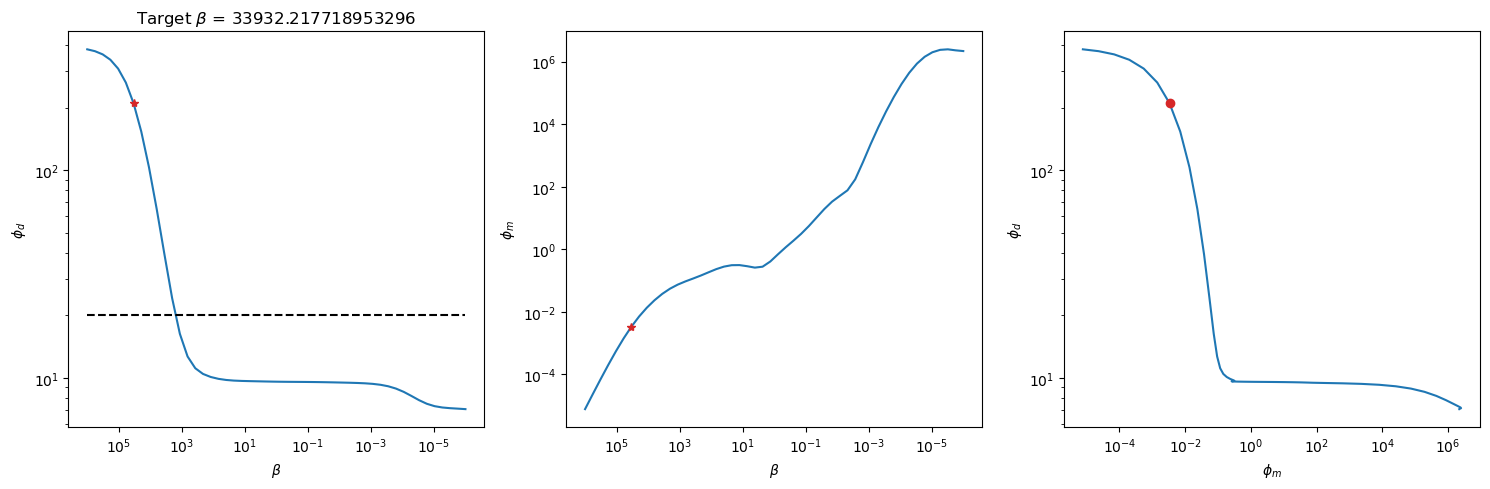

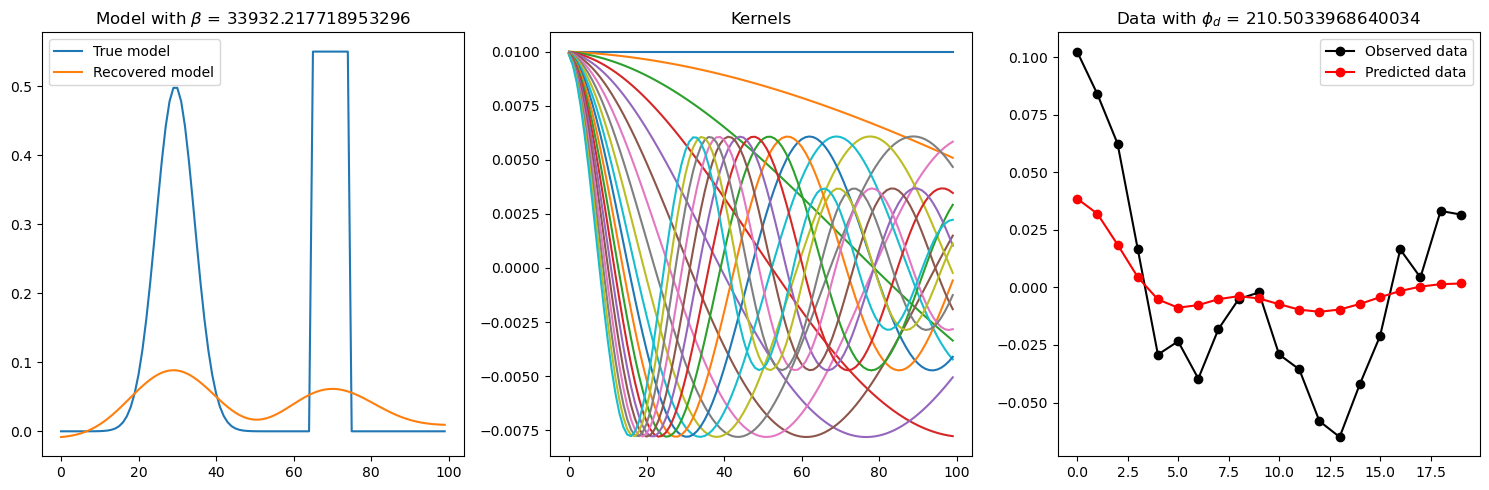

In [35]:
##Underfit Example
print("Underfitting with alpha_s = 1 and alpha_x = 0")
plot_tikhonov(beta_values=beta_values,phi_d=phi_d_tik, phi_m=phi_m_tik, iteration=target_iteration-5)
plot_results(mtrue, mrec_tik[:,target_iteration-5],G=G,d=dobs,beta=beta_values[target_iteration-5], phi_d=phi_d_tik[target_iteration-5])


Overfitting with alpha_s = 1 and alpha_x = 0


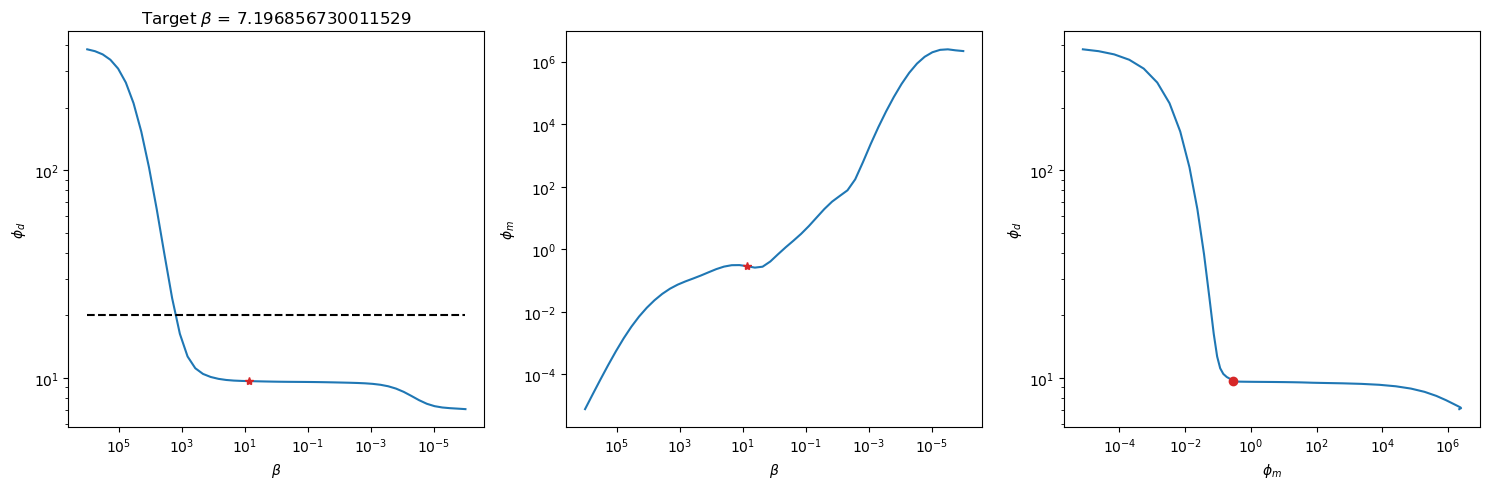

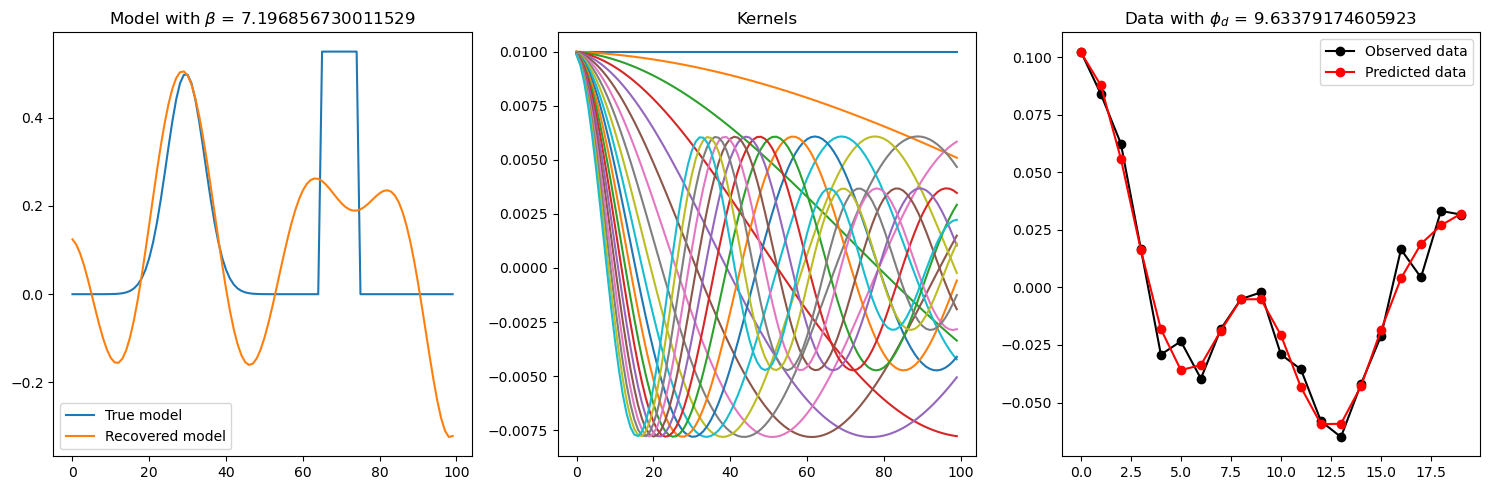

In [36]:
##Overfit Example
print("Overfitting with alpha_s = 1 and alpha_x = 0")
plot_tikhonov(beta_values=beta_values,phi_d=phi_d_tik, phi_m=phi_m_tik, iteration=target_iteration+10)
plot_results(mtrue, mrec_tik[:,target_iteration+10],G=G,d=dobs,beta=beta_values[target_iteration+10], phi_d=phi_d_tik[target_iteration+10])


# Q3.b)
Repeat the exercise from Q3a, but now set $\alpha_s = 0$, $\alpha_x = 1$. Again, choose 3 examples, one that underfits the data, one that overfits the data and one that acceptably fits the data. Try to choose these models such that the $\phi_d$ values are similar to those for the choices you made in part a.
Describe what is similar / different between the two scenarios.

In [37]:
n_beta = 50
beta_values = np.logspace(6,-6,n_beta)
alpha_s = 0
alpha_x = 1
target_misfit = len(dobs)

dclean = G @ mtrue
dobs_tik = dclean + std_dev * np.random.randn(len(dclean))

mrec_tik = np.zeros((len(x_centers), n_beta))  # np.nan * np.ones(shape)
phi_d_tik = np.zeros(n_beta)
phi_m_tik = np.zeros(n_beta)
target_beta = 0
target_iteration = 0

for i, beta in enumerate(beta_values):
    mrec_tik[:, i], phi_d_tik[i], phi_m_tik[i] = estimate_model(G=G,d=dobs,
                                                                n_kernels=n_kernels, std_dev=std_dev, x_nodes=x_nodes, mref=mref, beta=beta, alpha_s=alpha_s, alpha_x=alpha_x)
    if target_misfit<phi_d_tik[i]:
        target_beta = beta
        target_iteration = i


Optimal beta with alpha_s = 0 and alpha_x = 1


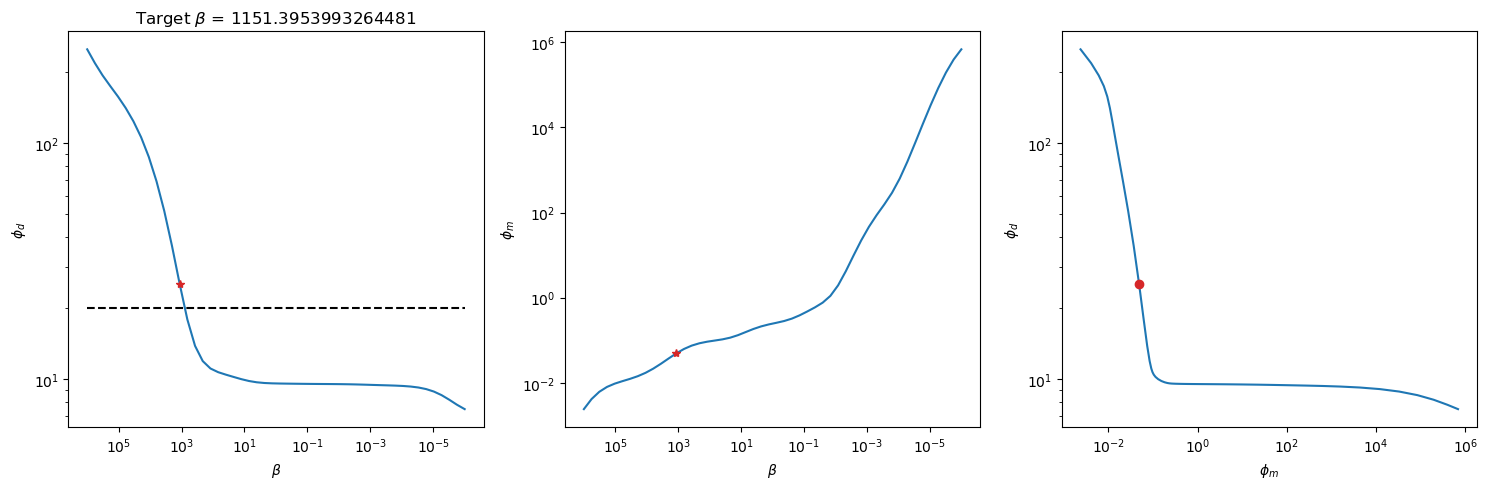

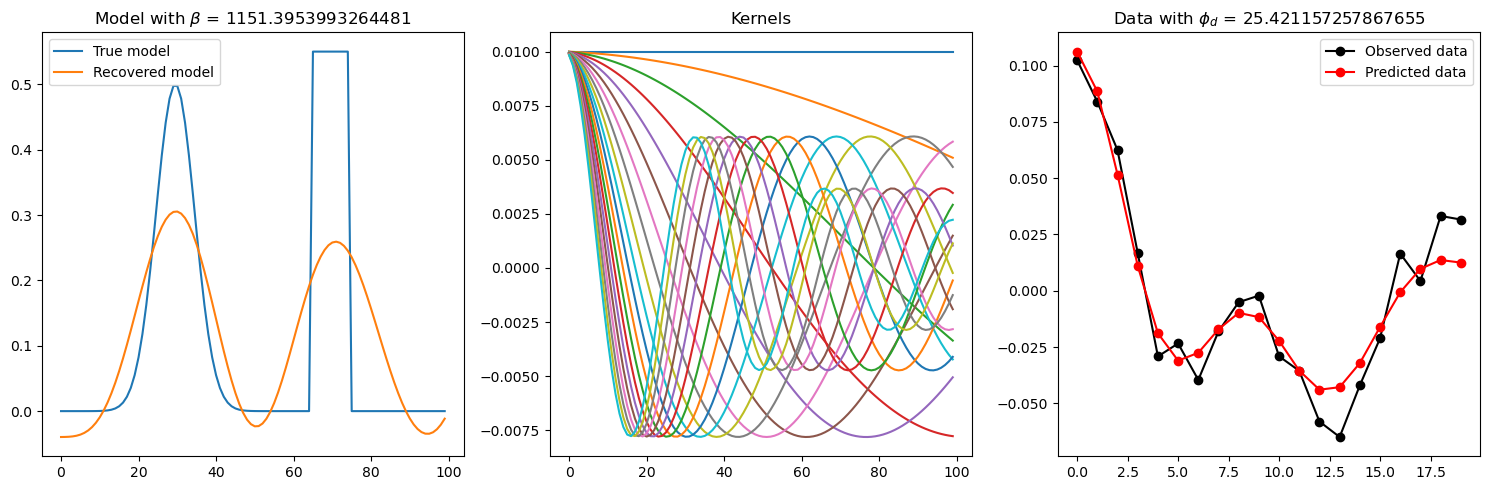

In [38]:
##Correct Example
print("Optimal beta with alpha_s = 0 and alpha_x = 1")
target_iteration1 = target_iteration
plot_tikhonov(beta_values=beta_values,phi_d=phi_d_tik, phi_m=phi_m_tik, iteration=target_iteration1)
plot_results(mtrue, mrec_tik[:,target_iteration1],G=G,d=dobs,beta=beta_values[target_iteration1], phi_d=phi_d_tik[target_iteration1])


Underfitting with alpha_s = 0 and alpha_x = 1


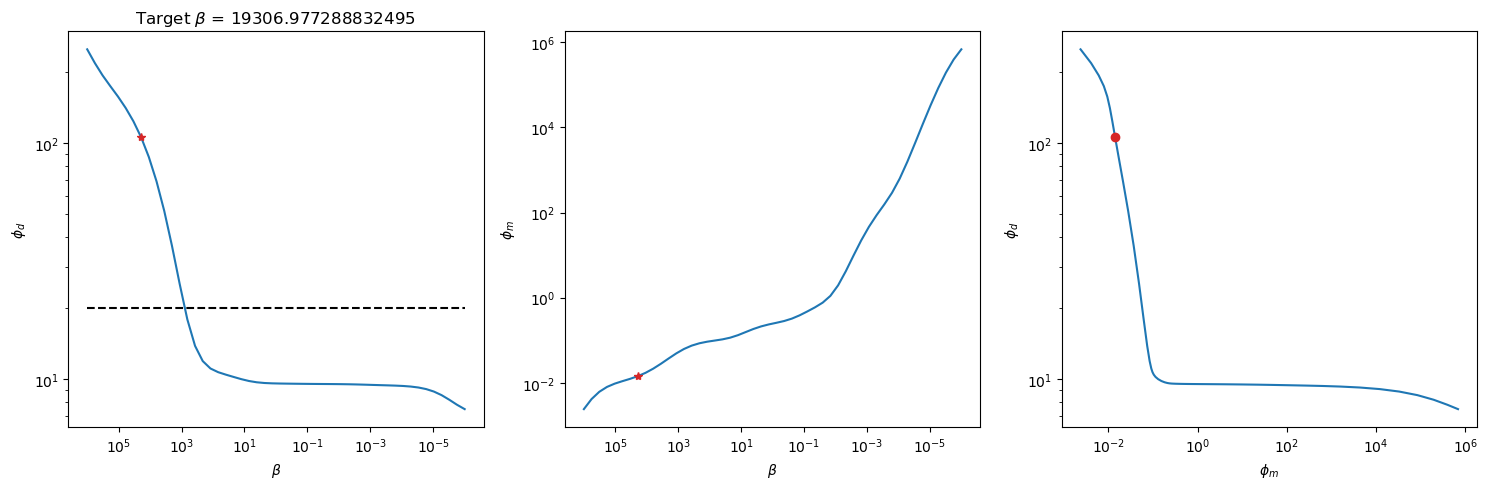

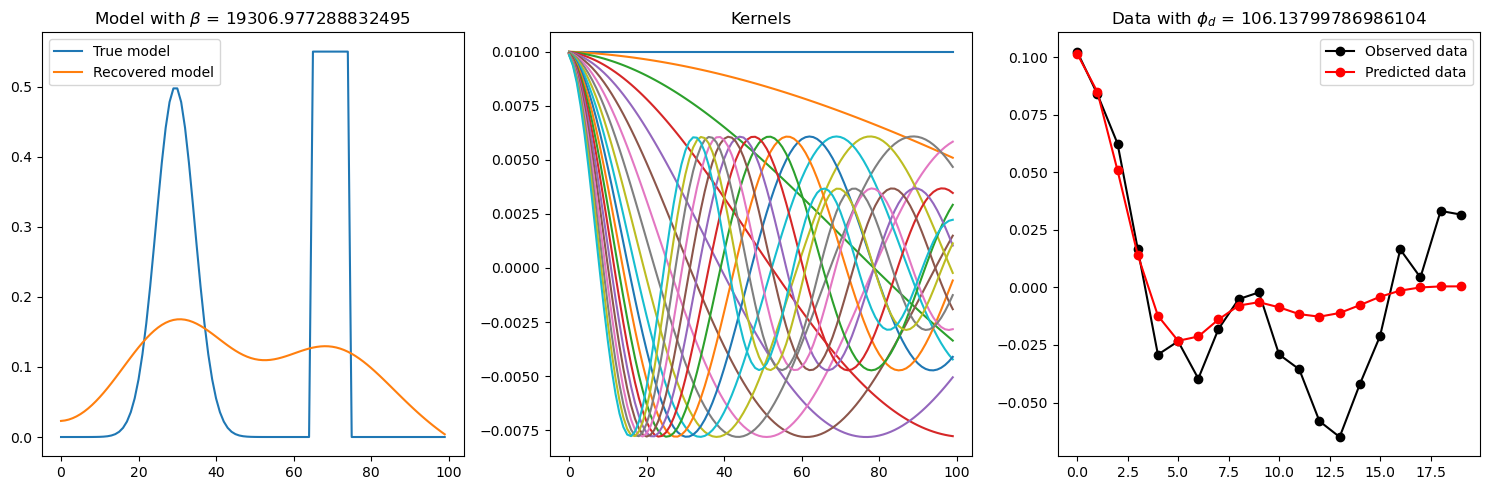

In [39]:
##Underfit Example
print("Underfitting with alpha_s = 0 and alpha_x = 1")
target_iteration1 = target_iteration-5
plot_tikhonov(beta_values=beta_values,phi_d=phi_d_tik, phi_m=phi_m_tik, iteration=target_iteration1)
plot_results(mtrue, mrec_tik[:,target_iteration1],G=G,d=dobs,beta=beta_values[target_iteration1], phi_d=phi_d_tik[target_iteration1])


Overfit with alpha_s = 0 and alpha_x = 1


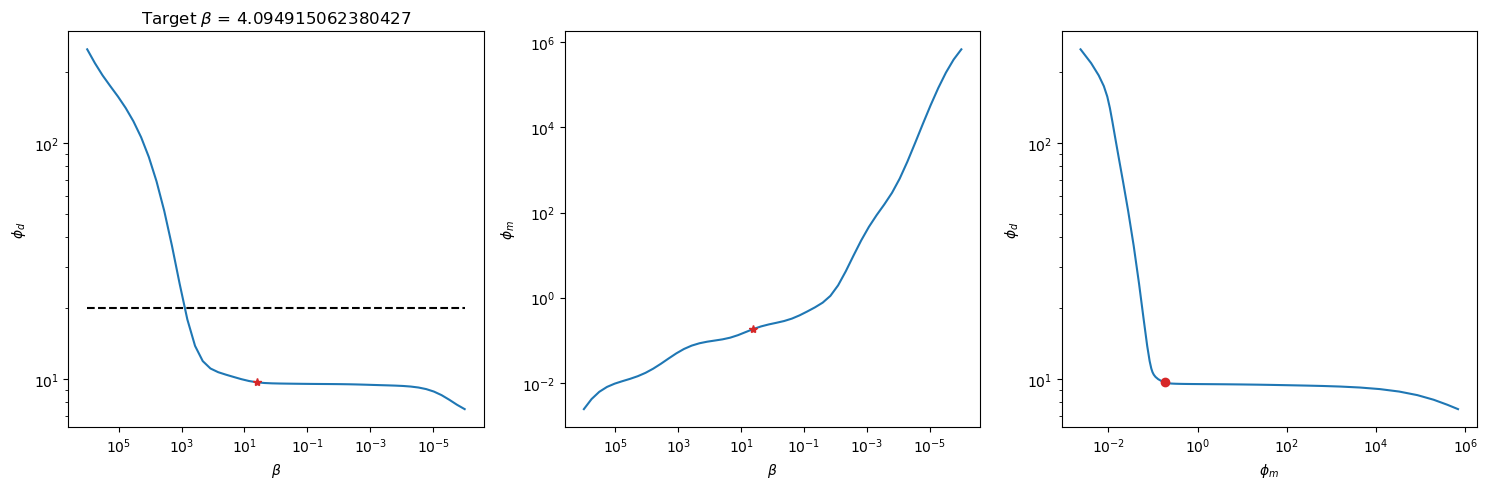

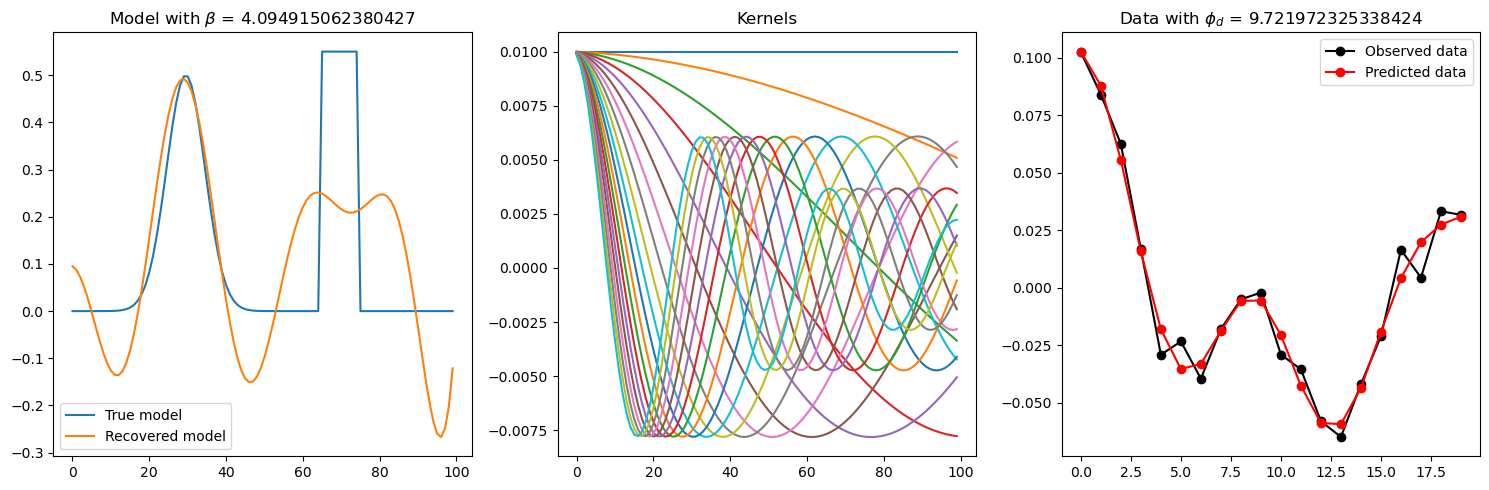

In [40]:
##Overfit Example
print("Overfit with alpha_s = 0 and alpha_x = 1")
target_iteration1 = target_iteration+10
plot_tikhonov(beta_values=beta_values,phi_d=phi_d_tik, phi_m=phi_m_tik, iteration=target_iteration1)
plot_results(mtrue, mrec_tik[:,target_iteration1],G=G,d=dobs,beta=beta_values[target_iteration1], phi_d=phi_d_tik[target_iteration1])


The recovered model for the optimal beta is similar for both scenarios. The recovered model for the underfitting example is also similar for both scenarios. However, the recovered model for the overfitting example is different for the two scenarios. The recovered model for the overfitting example with $\alpha_s = 1$ and $\alpha_x = 0$ is more osciallatory than the recovered model for the overfitting example with $\alpha_s = 0$ and $\alpha_x = 1$. The recovered model for the overfitting example with $\alpha_s = 0$ and $\alpha_x = 1$ is smoother than the recovered model for the overfitting example with $\alpha_s = 1$ and $\alpha_x = 0$.

# Q3.c)
Time to play! Choose to change something and explore what happens.
For example, you could change the model, the data, the number of kernels, the standard deviation of the data, the $\alpha$-values, etc.


Lets compare the results for different standard deviations of the data. We will use the same model and the same number of kernels and change the standard deviation of the data. We will use $\alpha_s = 1$ and $\alpha_x = 0$.

In [248]:

n_kernels = 20
j_values = np.linspace(0, 30, n_kernels)

G = build_G(x_nodes, n_kernels ,j_values=j_values, p=-0.05, q=0.1)
dclean = G @ mtrue
dobs = dclean + 0.01 * np.random.randn(len(dclean))

Wd, Ws, Wx = build_weight_matrices(n_kernels, std_dev, x_nodes)

mref = np.zeros(n_cells)

n_beta = 50
beta_values = np.logspace(6,-6,n_beta)
alpha_s = 1
alpha_x = 0
target_misfit = len(dobs)

for i, beta in enumerate(beta_values):
    mrec_tik[:, i], phi_d_tik[i], phi_m_tik[i] = estimate_model(G=G,d=dobs,
                                                                n_kernels=n_kernels, std_dev=std_dev, x_nodes=x_nodes, mref=mref, beta=beta, alpha_s=alpha_s, alpha_x=alpha_x)
    if target_misfit<phi_d_tik[i]:
        target_beta = beta
        target_iteration = i


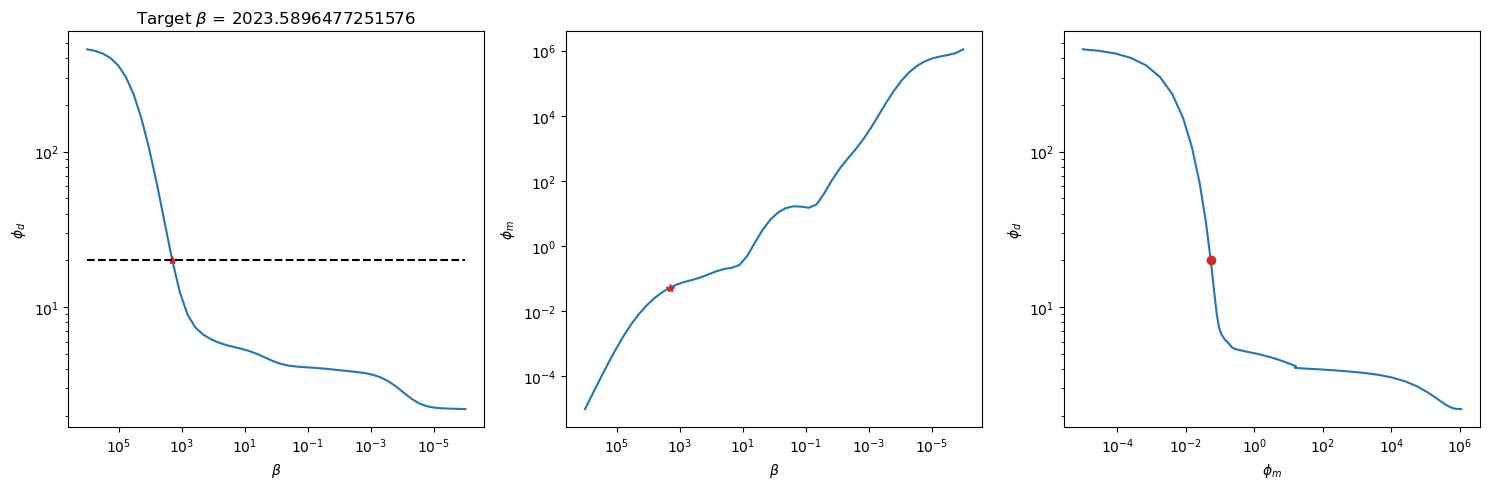

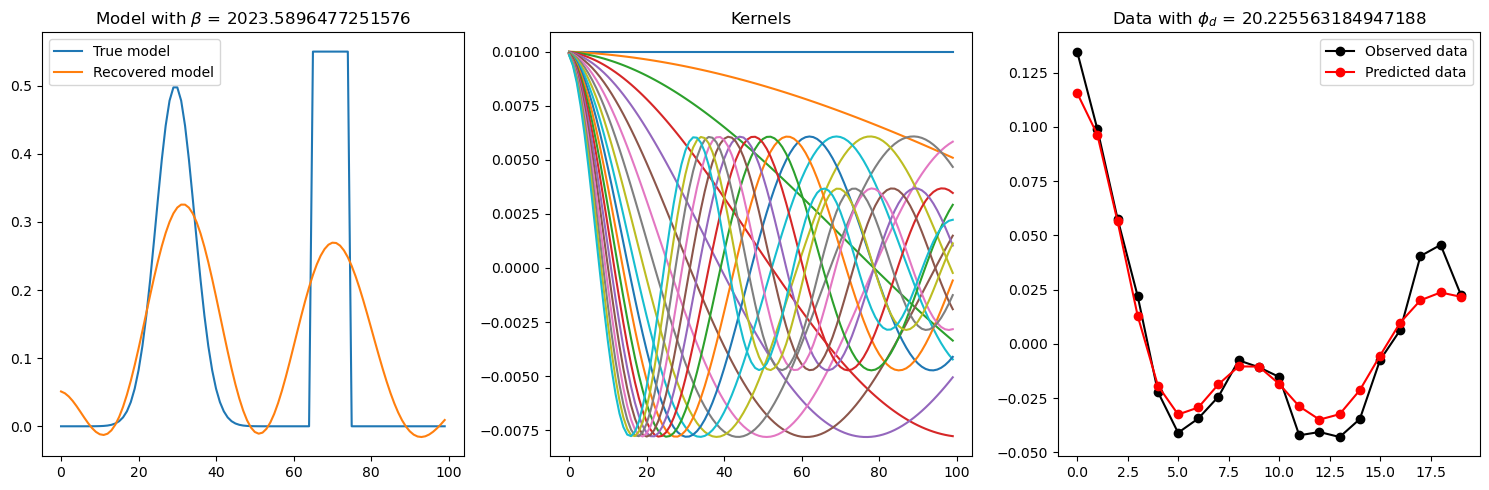

std_dev = 0.01


In [249]:
plot_tikhonov(beta_values=beta_values,phi_d=phi_d_tik, phi_m=phi_m_tik, iteration=target_iteration)
plot_results(mtrue, mrec_tik[:,target_iteration],G=G,d=dobs,beta=beta_values[target_iteration], phi_d=phi_d_tik[target_iteration])
print("std_dev = 0.01")

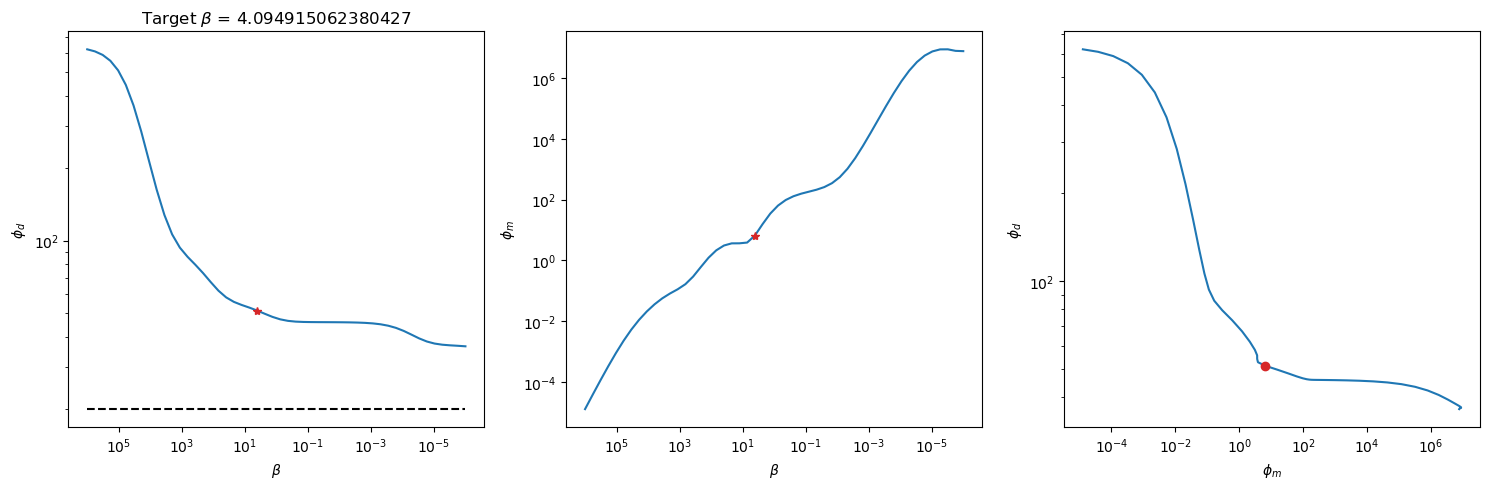

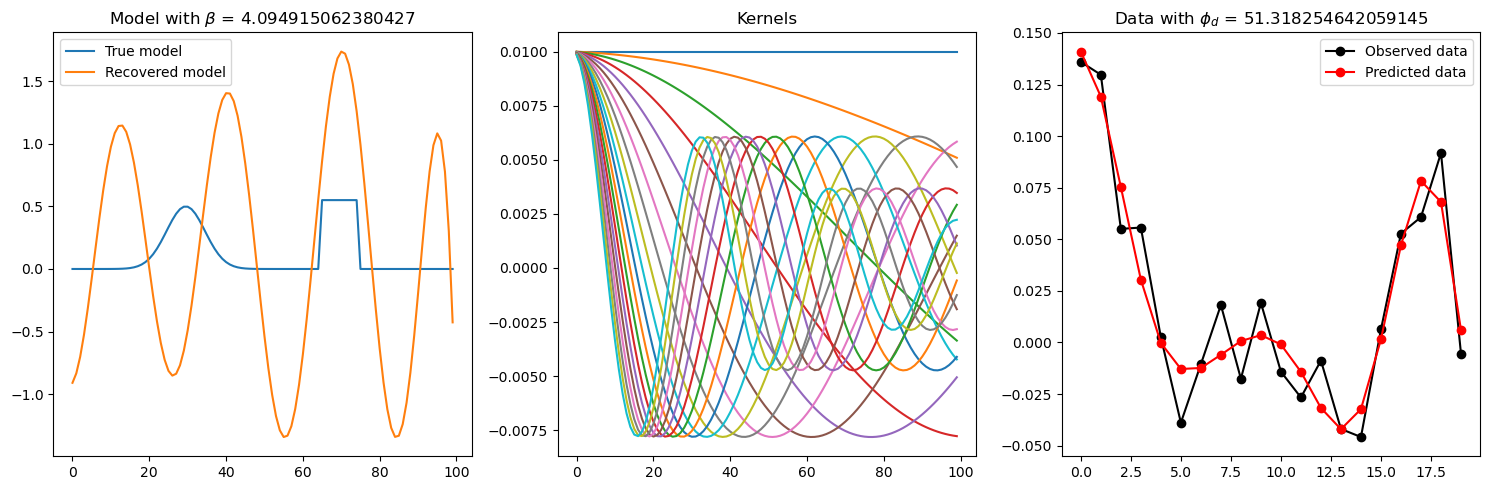

std_dev = 0.03


In [247]:
#target_iteration1 = target_iteration-35
plot_tikhonov(beta_values=beta_values,phi_d=phi_d_tik, phi_m=phi_m_tik, iteration=target_iteration1)
plot_results(mtrue, mrec_tik[:,target_iteration1],G=G,d=dobs,beta=beta_values[target_iteration1], phi_d=phi_d_tik[target_iteration1])
print("std_dev = 0.03")

Chnaging the standrad deviation from 1% to 3% of the observed data has a large effect on the inversion results. The inversion fails to hit our target misfit for the larger standard deviation and the recovered model is also more osciallatory for the larger standard deviation.

# Q4). SVD
We will set up and solve the inverse problem using Singular Value Decomposition (SVD).
a)Perform the SVD decomposition of the system matrix $\mathbf{G} = \mathbf{U\Lambda V}^\top$. Generate a plot with 2 panels, show the singular values (on a log scale) and plot the first few singular vectors (use different colors to highlight which vectors correspond to each singular value)


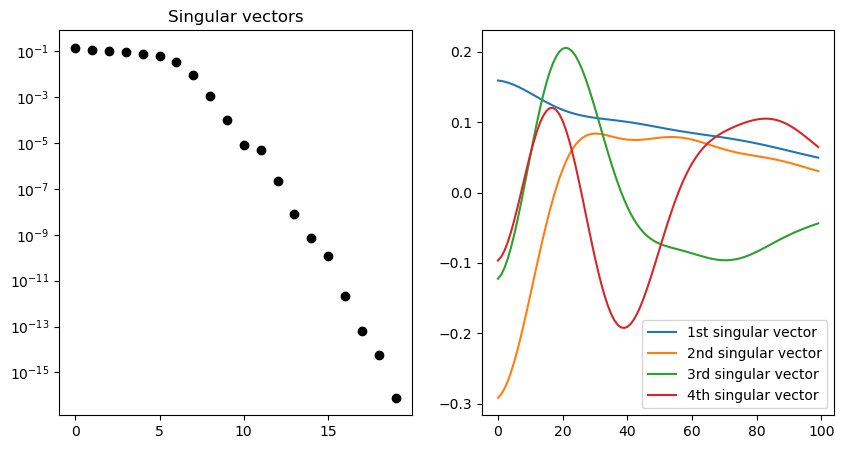

In [250]:
G = build_G(x_nodes, n_kernels ,j_values=j_values, p=-0.05, q=0.1)
U, s, Vt = np.linalg.svd(G, full_matrices=False)
V=Vt.T
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].semilogy(s, "ok")
ax[0].set_title("Singular values")
ax[1].plot(V[:, 0], label="1st singular vector")
ax[1].plot(V[:, 1], label="2nd singular vector")
ax[1].plot(V[:, 2], label="3rd singular vector")
ax[1].plot(V[:, 3], label="4th singular vector")
ax[0].set_title("Singular vectors")
ax[1].legend()
plt.show()

# Q4.b)
As we discussed in class, the model can be constructed from the singular values and vectors according to
\begin{equation}
    \mathbf{m}_c = \sum_{i=1}^p \left(\frac{\mathbf{u_i}^\top \mathbf{d}^{obs}}{\lambda_i} \mathbf{v_i}\right)
\end{equation}
Create a function that returns $\mathbf{m}_c$ given the matrix $\mathbf{G}$ and a choice of the number of singular vectors, $p$. Generate a plot that shows: (a) the singular values, (b) the data misfit as a function of the number of singular vectors used to construct the solution (similar to the top left plot in Figure \ref{fig:Tikhonov-curves-example}, but replacing $\beta$ on the x axis with $p$, (c) the true and predicted models, and (d) predicted and observed data.


In [274]:
std_dev = 1e-2
dclean = G @ mtrue
dobs = dclean + std_dev * np.random.randn(len(dclean))

def estimate_model_svd(G, d, p):
    U, s, Vt = np.linalg.svd(G, full_matrices=False)
    V=Vt.T
    mc = np.zeros(len(x_centers))
    for i in range(p):
        mc += (U[:, i].T @ d) / s[i] * V[:, i]
    return mc, U, s, V

p_values = np.arange(1, 21)
phi_d_svd = np.zeros(len(p_values))
mrec_svd = np.zeros((len(x_centers), len(p_values)))

for i, p in enumerate(p_values):
    mrec_svd[:, i], U, s, V = estimate_model_svd(G, dobs, p)
    residual_data = G @ mrec_svd[:, i] - dobs
    phi_d_svd[i] = residual_data.T @ residual_data




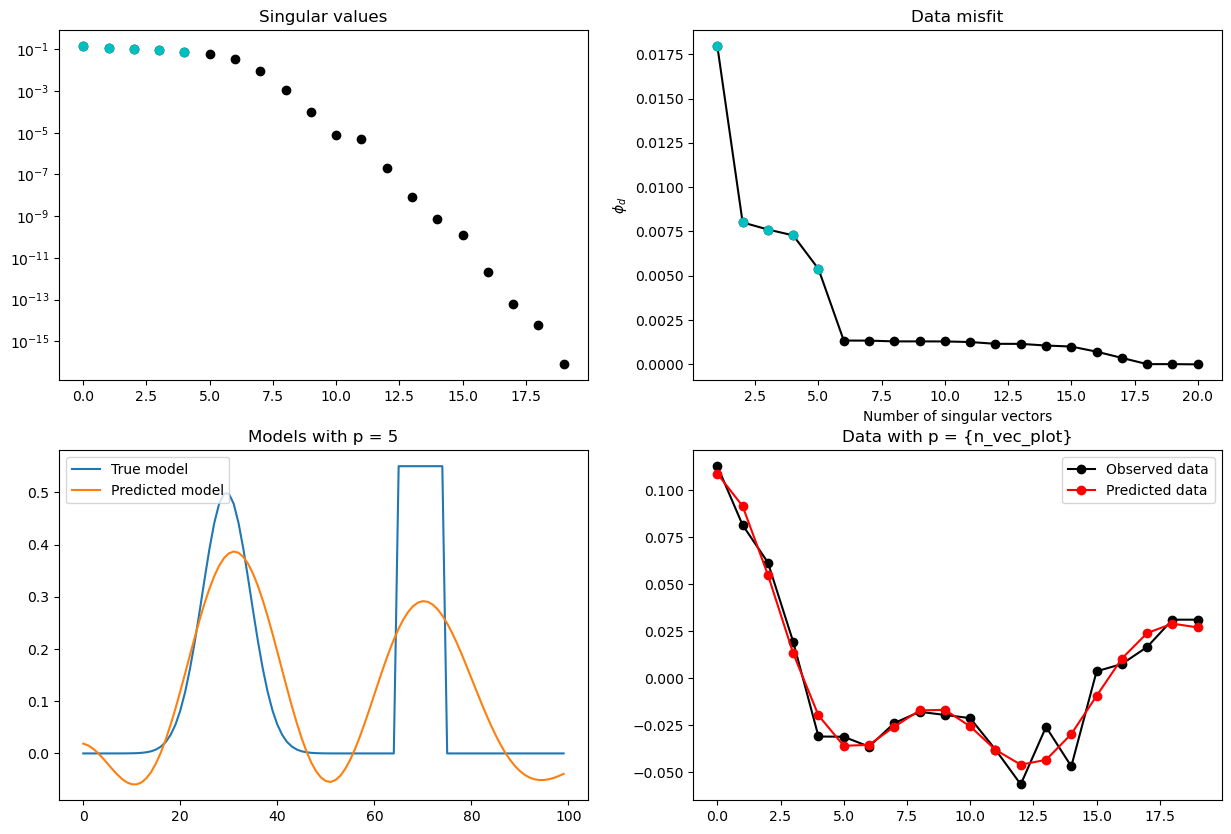

In [275]:
n_vec_plot = 5
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].semilogy(s, "ok")
ax[0, 0].plot(s[:n_vec_plot], "oc")
ax[0, 0].set_title("Singular values")
ax[0, 1].plot(p_values, phi_d_svd, "o-k")
ax[0, 1].plot(p_values[:n_vec_plot], phi_d_svd[:n_vec_plot], "oc")
ax[0, 1].set_title("Data misfit")
ax[0, 1].set_xlabel("Number of singular vectors")
ax[0, 1].set_ylabel("$\\phi_d$")

ax[1, 0].plot(mtrue, label="True model")
ax[1, 0].plot(mrec_svd[:, n_vec_plot], label="Predicted model")
ax[1, 0].set_title(f"Models with p = {n_vec_plot}")
ax[1, 0].legend()
ax[1, 1].plot(dobs, "o-k", label="Observed data")
ax[1, 1].plot(G @ mrec_svd[:, n_vec_plot], "o-r", label="Predicted data")
ax[1, 1].set_title("Data with p = {n_vec_plot}")
ax[1, 1].legend()
plt.show()

# Q4.c)
Using the code you wrote for Q4b, show 3 different choices of the number of singular values: one that underfits the data, one that overfits the data, and one that acceptably fits the data. Specify which is which.


Number of singular vectors = 2


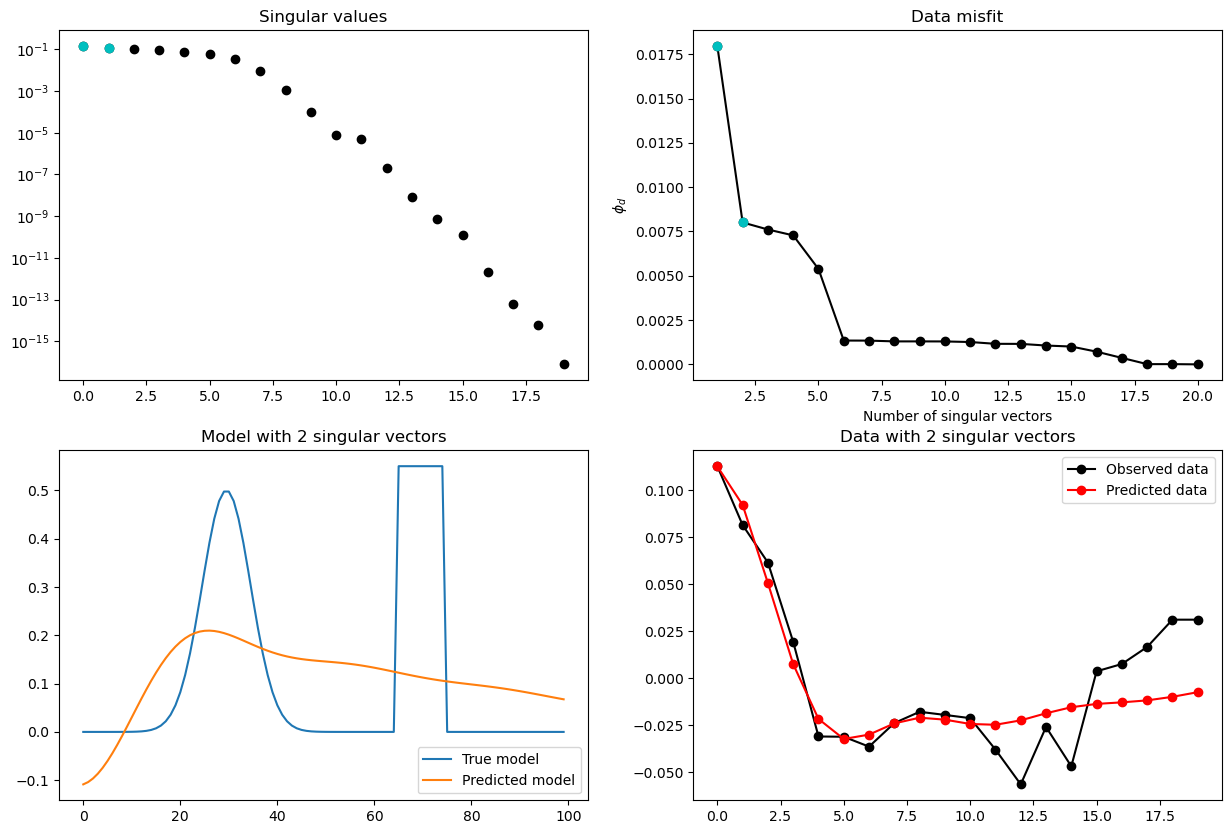

Number of singular vectors = 5


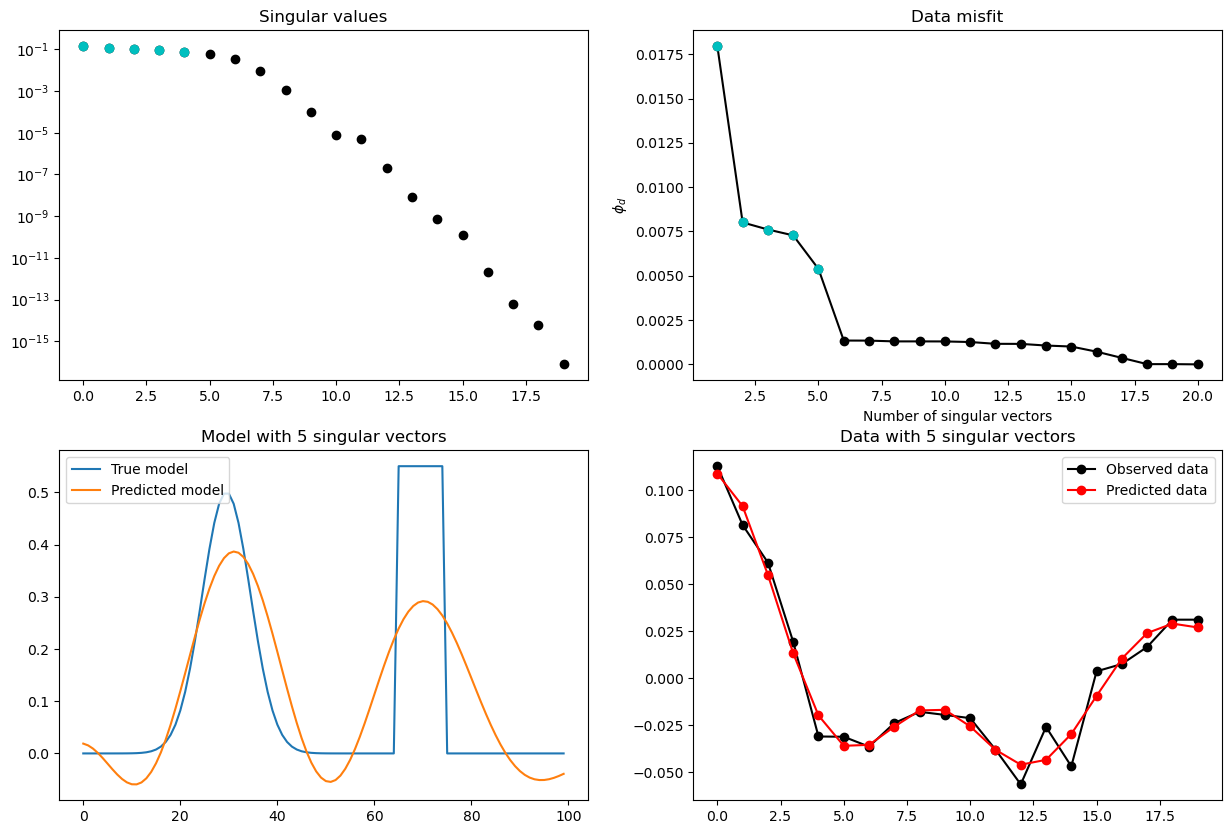

Number of singular vectors = 15


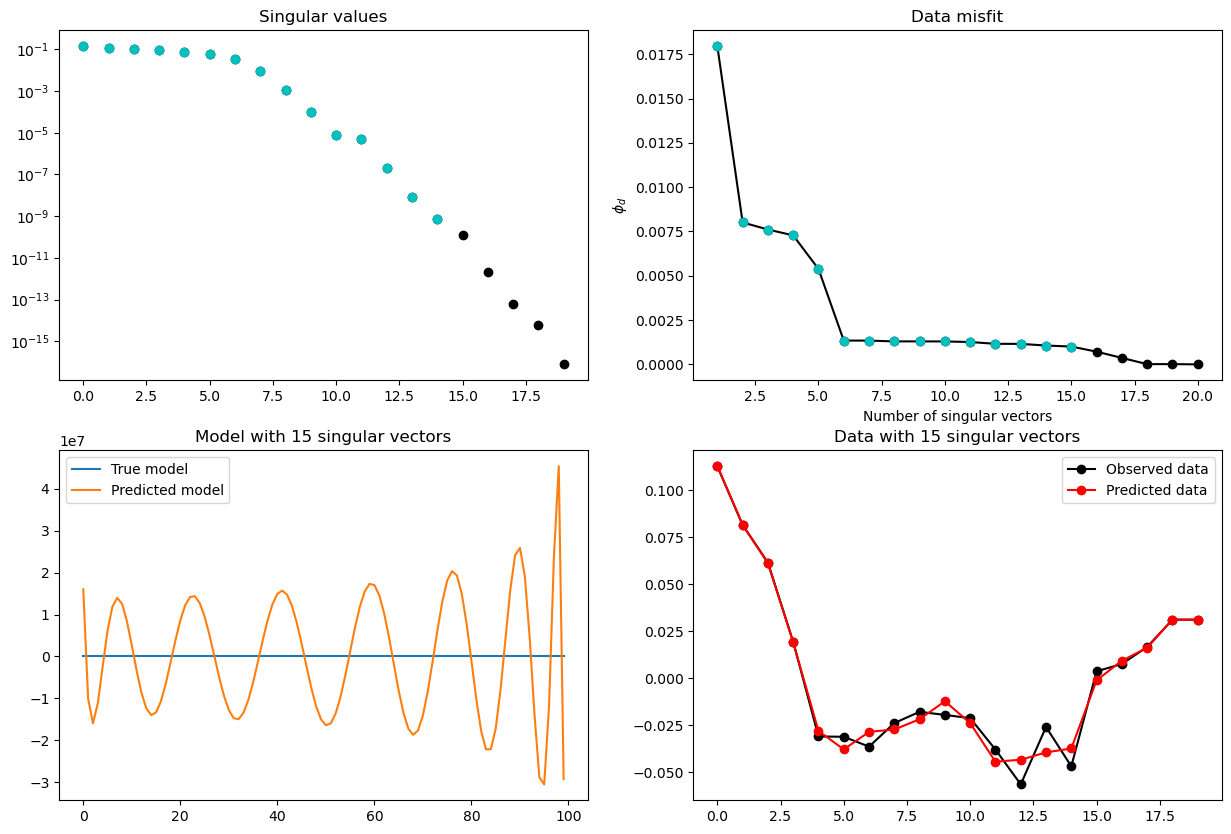

In [277]:
n_vec_plot = [2,5,15]

for i,n_vec_plot in enumerate(n_vec_plot):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    print(f"Number of singular vectors = {n_vec_plot}")
    ax[0, 0].semilogy(s, "ok")
    ax[0, 0].plot(s[:n_vec_plot], "oc")
    ax[0, 0].set_title("Singular values")
    ax[0, 1].plot(p_values, phi_d_svd, "o-k")
    ax[0, 1].plot(p_values[:n_vec_plot], phi_d_svd[:n_vec_plot], "oc")
    ax[0, 1].set_title("Data misfit")
    ax[0, 1].set_xlabel("Number of singular vectors")
    ax[0, 1].set_ylabel("$\\phi_d$")

    ax[1, 0].plot(mtrue, label="True model")
    ax[1, 0].plot(mrec_svd[:, n_vec_plot], label="Predicted model")
    ax[1, 0].set_title(f"Model with {n_vec_plot} singular vectors")
    ax[1, 0].legend()
    ax[1, 1].plot(dobs, "o-k", label="Observed data")
    ax[1, 1].plot(G @ mrec_svd[:, n_vec_plot], "o-r", label="Predicted data")
    ax[1, 1].set_title(f"Data with {n_vec_plot} singular vectors")
    ax[1, 1].legend()
    plt.show()



# Q4.d)
Time to play! Change the kernels: what happens if you change the kernels and make them more / less oscillitory? or what if the decay more / less rapidly. Pick something to explore and generate a few plots to illustrate what you learned. I am expecting something no more that 2-3 plots that illustrate whatever you choose to explore.


In [279]:
##Change the number of kernels to 50 from 20

n_kernels = 50
j_values = np.linspace(0, 30, n_kernels)

G_svd = build_G(x_nodes, n_kernels ,j_values=j_values, p=-0.01, q=0.1)
dclean_svd = G_svd @ mtrue
dobs_svd = dclean_svd + 0.01 * np.random.randn(len(dclean_svd))

Wd_svd, Ws_svd, Wx_svd = build_weight_matrices(n_kernels, std_dev, x_nodes)

p_values = np.arange(1, n_kernels)
phi_d_svd = np.zeros(len(p_values))
mrec_svd = np.zeros((len(x_centers), len(p_values)))

for i, p in enumerate(p_values):
    mrec_svd[:, i], U_svd, s_svd, V_svd = estimate_model_svd(G_svd, dobs_svd, p)
    residual_data_svd = G_svd @ mrec_svd[:, i] - dobs_svd
    phi_d_svd[i] = residual_data_svd.T @ residual_data_svd



Number of singular vectors = 2


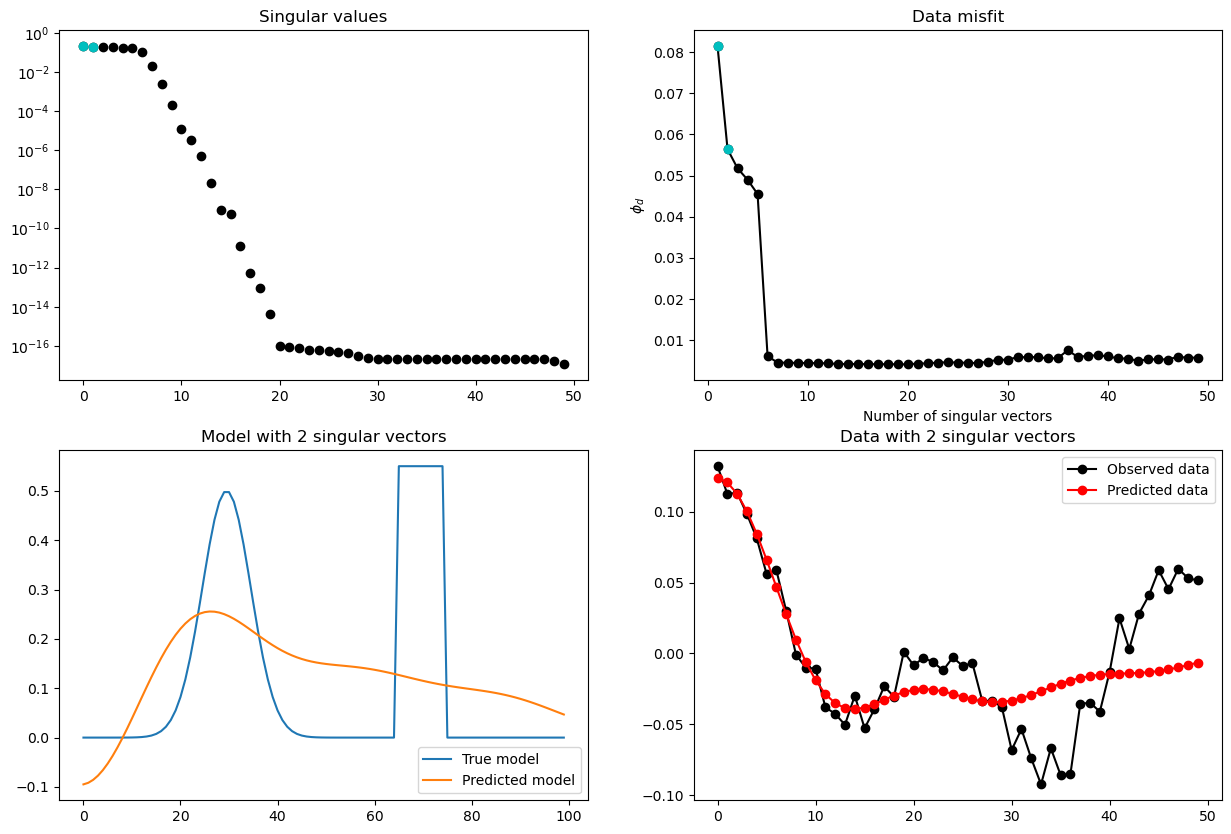

Number of singular vectors = 5


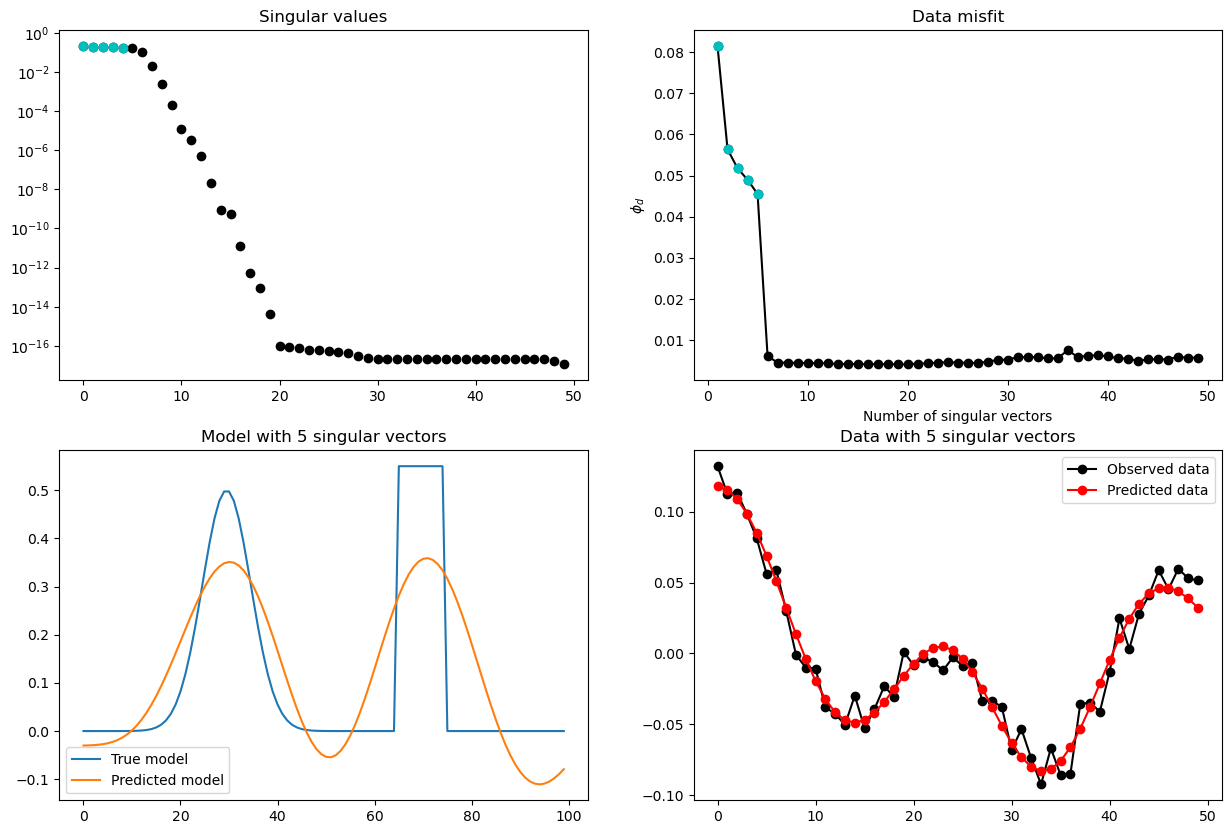

Number of singular vectors = 30


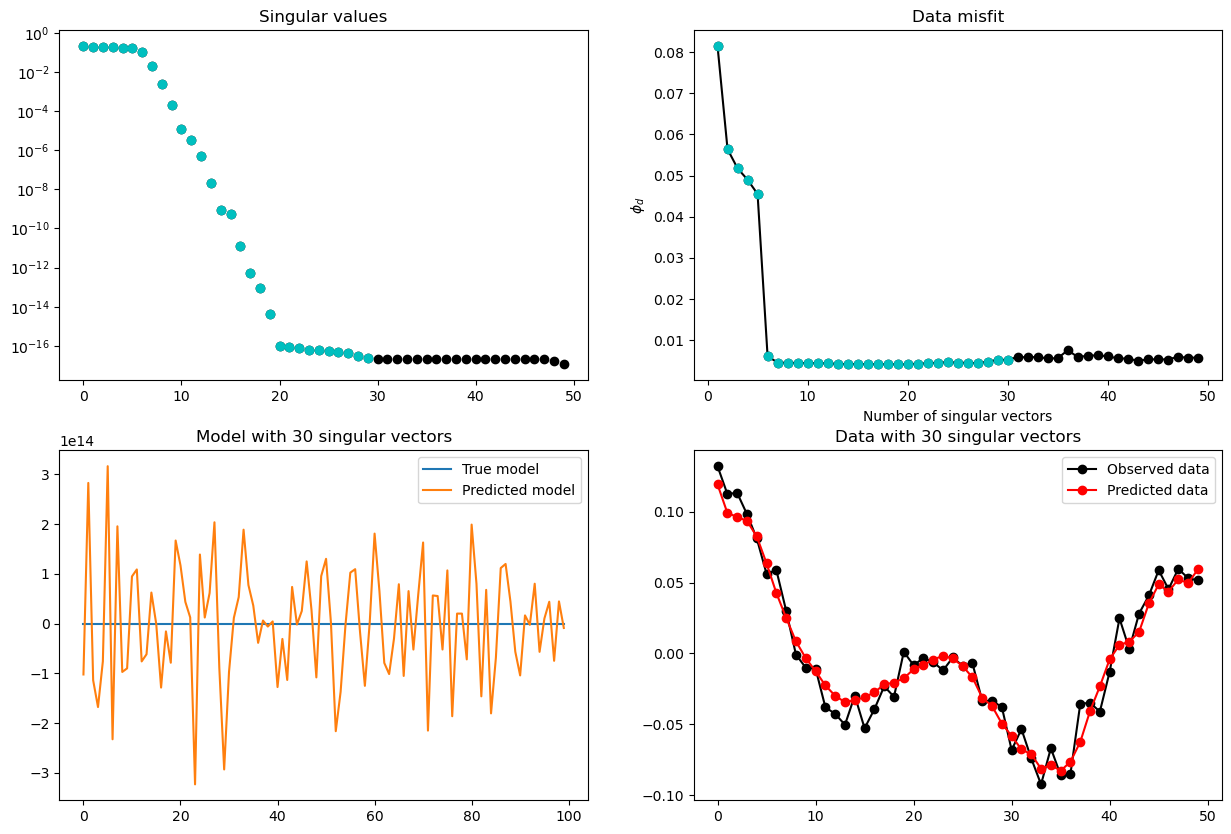

In [280]:
n_vec_plot = [2,5,30]

for i,n_vec_plot in enumerate(n_vec_plot):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    print(f"Number of singular vectors = {n_vec_plot}")
    ax[0, 0].semilogy(s_svd, "ok")
    ax[0, 0].plot(s_svd[:n_vec_plot], "oc")
    ax[0, 0].set_title("Singular values")
    ax[0, 1].plot(p_values, phi_d_svd, "o-k")
    ax[0, 1].plot(p_values[:n_vec_plot], phi_d_svd[:n_vec_plot], "oc")
    ax[0, 1].set_title("Data misfit")
    ax[0, 1].set_xlabel("Number of singular vectors")
    ax[0, 1].set_ylabel("$\\phi_d$")

    ax[1, 0].plot(mtrue, label="True model")
    ax[1, 0].plot(mrec_svd[:, n_vec_plot], label="Predicted model")
    ax[1, 0].set_title(f"Model with {n_vec_plot} singular vectors")
    ax[1, 0].legend()
    ax[1, 1].plot(dobs_svd, "o-k", label="Observed data")
    ax[1, 1].plot(G_svd @ mrec_svd[:, n_vec_plot], "o-r", label="Predicted data")
    ax[1, 1].set_title(f"Data with {n_vec_plot} singular vectors")
    ax[1, 1].legend()
    plt.show()

Changing the number of kernels show that even with greater number of kernels and thus data, the first 5 vectors are able to capture the data well. As well, the overfitting when including larger number of vectors is apparent similar to the case where no regularization was included.